In [1]:
### Heart Disease

#####################################################################################

# This file only includes the codes for this project. 
# All details and decriptions can be seen in the Rmd or Docx file.
# A brief overview: read, summarize, clean, train & test, logistic regression,
# support vector machines, predict, compare, accuracy, log. 
# The docx report has a description for the variables.

In [3]:
### Read, View, Structure, Summary  
heart <- read.csv(file.choose())
#View(heart)
str(heart)
# use dim(heart) if only want dimensions
summary(heart)
# 303 obs. of 15 variables (12 numeric, 3 factors)

'data.frame':	303 obs. of  15 variables:
 $ X        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Age      : int  63 67 67 37 41 56 62 57 63 53 ...
 $ Sex      : int  1 1 1 1 0 1 0 0 1 1 ...
 $ ChestPain: Factor w/ 4 levels "asymptomatic",..: 4 1 1 2 3 3 1 1 1 1 ...
 $ RestBP   : int  145 160 120 130 130 120 140 120 130 140 ...
 $ Chol     : int  233 286 229 250 204 236 268 354 254 203 ...
 $ Fbs      : int  1 0 0 0 0 0 0 0 0 1 ...
 $ RestECG  : int  2 2 2 0 2 0 2 0 2 2 ...
 $ MaxHR    : int  150 108 129 187 172 178 160 163 147 155 ...
 $ ExAng    : int  0 1 1 0 0 0 0 1 0 1 ...
 $ Oldpeak  : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ Slope    : int  3 2 2 3 1 1 3 1 2 3 ...
 $ Ca       : int  0 3 2 0 0 0 2 0 1 0 ...
 $ Thal     : Factor w/ 3 levels "fixed","normal",..: 1 2 3 2 2 2 2 2 3 3 ...
 $ AHD      : Factor w/ 2 levels "No","Yes": 1 2 2 1 1 1 2 1 2 2 ...


       X              Age             Sex                ChestPain  
 Min.   :  1.0   Min.   :29.00   Min.   :0.0000   asymptomatic:144  
 1st Qu.: 76.5   1st Qu.:48.00   1st Qu.:0.0000   nonanginal  : 86  
 Median :152.0   Median :56.00   Median :1.0000   nontypical  : 50  
 Mean   :152.0   Mean   :54.44   Mean   :0.6799   typical     : 23  
 3rd Qu.:227.5   3rd Qu.:61.00   3rd Qu.:1.0000                     
 Max.   :303.0   Max.   :77.00   Max.   :1.0000                     
                                                                    
     RestBP           Chol            Fbs            RestECG      
 Min.   : 94.0   Min.   :126.0   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:120.0   1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :130.0   Median :241.0   Median :0.0000   Median :1.0000  
 Mean   :131.7   Mean   :246.7   Mean   :0.1485   Mean   :0.9901  
 3rd Qu.:140.0   3rd Qu.:275.0   3rd Qu.:0.0000   3rd Qu.:2.0000  
 Max.   :200.0   Max.   :564.0   Max.   :1.000

In [4]:
### Clean
anyNA(heart)
# TRUE: contains NA values
# removed NA rows and 'X' variable
heart1 <- heart[,-c(1)]
heart1 <- na.omit(heart1)
# heart1 <- heart1[complete.cases(heart1), ]
anyNA(heart1)
# FALSE

[1] TRUE

[1] FALSE

In [5]:
### Factors with levels
heart1$Sex <- as.factor(heart1$Sex)
levels(heart1$Sex) <- c("female","male") 
heart1$ChestPain <- as.factor(heart1$ChestPain)
heart1$Fbs <- as.factor(heart1$Fbs)
levels(heart1$Fbs) <- c("false","true")
heart1$RestECG <- as.factor(heart1$RestECG)
levels(heart1$RestECG) <- c("normal","stt","hypertrophy")
heart1$ExAng <- as.factor(heart1$ExAng)
levels(heart1$ExAng) <- c("no","yes")
heart1$Slope <- as.factor(heart1$Slope)
levels(heart1$Slope) <- c("upsloping","flat","downsloping")
heart1$Ca <- as.factor(heart1$Ca)
levels(heart1$Ca) <- c("0 major vessels","1 major vessel","2 major vessels","3 major vessels")
levels(heart1$AHD) <- c("<50% diam.",">50% diam.")
str(heart1) 

'data.frame':	297 obs. of  14 variables:
 $ Age      : int  63 67 67 37 41 56 62 57 63 53 ...
 $ Sex      : Factor w/ 2 levels "female","male": 2 2 2 2 1 2 1 1 2 2 ...
 $ ChestPain: Factor w/ 4 levels "asymptomatic",..: 4 1 1 2 3 3 1 1 1 1 ...
 $ RestBP   : int  145 160 120 130 130 120 140 120 130 140 ...
 $ Chol     : int  233 286 229 250 204 236 268 354 254 203 ...
 $ Fbs      : Factor w/ 2 levels "false","true": 2 1 1 1 1 1 1 1 1 2 ...
 $ RestECG  : Factor w/ 3 levels "normal","stt",..: 3 3 3 1 3 1 3 1 3 3 ...
 $ MaxHR    : int  150 108 129 187 172 178 160 163 147 155 ...
 $ ExAng    : Factor w/ 2 levels "no","yes": 1 2 2 1 1 1 1 2 1 2 ...
 $ Oldpeak  : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ Slope    : Factor w/ 3 levels "upsloping","flat",..: 3 2 2 3 1 1 3 1 2 3 ...
 $ Ca       : Factor w/ 4 levels "0 major vessels",..: 1 4 3 1 1 1 3 1 2 1 ...
 $ Thal     : Factor w/ 3 levels "fixed","normal",..: 1 2 3 2 2 2 2 2 3 3 ...
 $ AHD      : Factor w/ 2 levels "<50% diam.",">5

corrplot 0.84 loaded


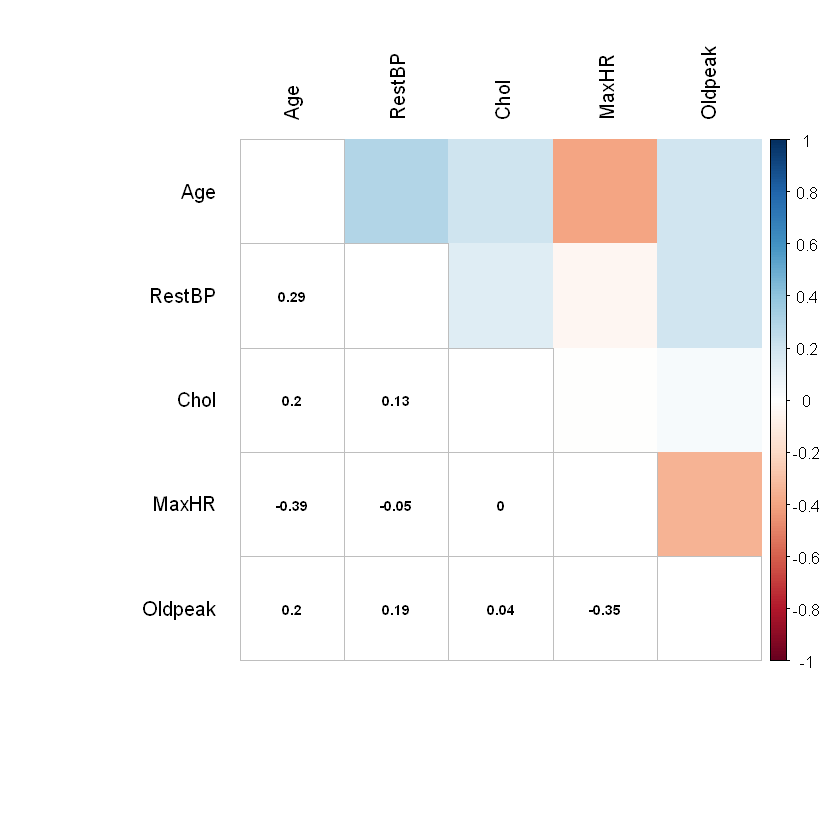

In [6]:
### Correlation of Continuous variables
library(corrplot)
heart2 <- heart1[, c("Age","RestBP","Chol","MaxHR","Oldpeak")]
heart2 <- as.data.frame(heart2)
g <- cor(heart2)
corrplot.mixed(g, upper = "color", lower = "number", lower.col = "black", number.cex = .7,
               tl.pos = "lt", tl.col = "black", tl.offset=1)

In [7]:
not_num <- heart1[, -which(names(heart1) %in% c("Age","RestBP", "Chol", "MaxHR", "Oldpeak"))]
label_val <- function(x){
  w <- table( x , AHD = heart1$AHD)
  return(w)
}
apply(not_num, 2, label_val)

$Sex
        AHD
x        <50% diam. >50% diam.
  female         71         25
  male           89        112

$ChestPain
              AHD
x              <50% diam. >50% diam.
  asymptomatic         39        103
  nonanginal           65         18
  nontypical           40          9
  typical              16          7

$Fbs
       AHD
x       <50% diam. >50% diam.
  false        137        117
  true          23         20

$RestECG
             AHD
x             <50% diam. >50% diam.
  hypertrophy         67         79
  normal              92         55
  stt                  1          3

$ExAng
     AHD
x     <50% diam. >50% diam.
  no         137         63
  yes         23         74

$Slope
             AHD
x             <50% diam. >50% diam.
  downsloping          9         12
  flat                48         89
  upsloping          103         36

$Ca
                 AHD
x                 <50% diam. >50% diam.
  0 major vessels        129         45
  1 major vessel     

In [8]:
### Mean, median, and SD for all columns that are not factors ###############  
mean <- sapply(heart1[,c("Age", "RestBP", "Chol", "MaxHR", "Oldpeak")], tapply, INDEX=heart1$AHD, mean)
median <- sapply(heart1[,c("Age", "RestBP", "Chol", "MaxHR", "Oldpeak")], tapply, INDEX=heart1$AHD, median)
sd <- sapply(heart1[,c("Age", "RestBP", "Chol", "MaxHR", "Oldpeak")], tapply, INDEX=heart1$AHD, sd)
stat_list <- list(MEAN=mean, MEDIAN=median, SD=sd)
stat_list

,Age,RestBP,Chol,MaxHR,Oldpeak
<50% diam.,52.64375,129.175,243.4938,158.5813,0.598750
>50% diam.,56.75912,134.635,251.8540,139.1095,1.589051
,Age,RestBP,Chol,MaxHR,Oldpeak
<50% diam.,52,130,235.5,161,0.2
>50% diam.,58,130,253.0,142,1.4
,Age,RestBP,Chol,MaxHR,Oldpeak
<50% diam.,9.551151,16.37399,53.75755,19.04330,0.7871601
>50% diam.,7.899670,18.89673,49.67994,22.71067,1.3050061


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


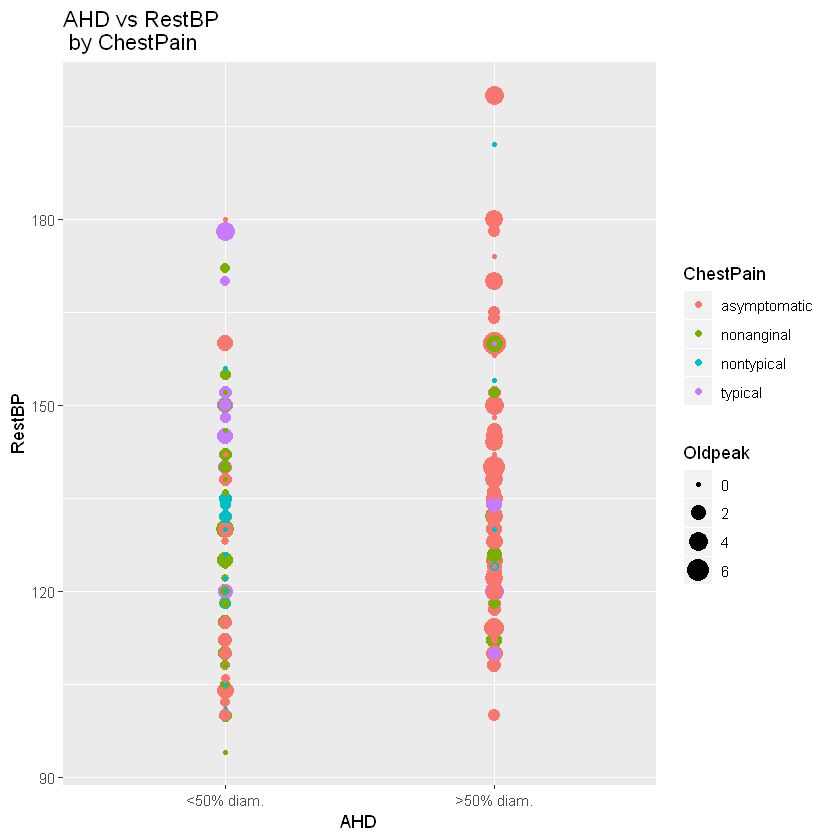

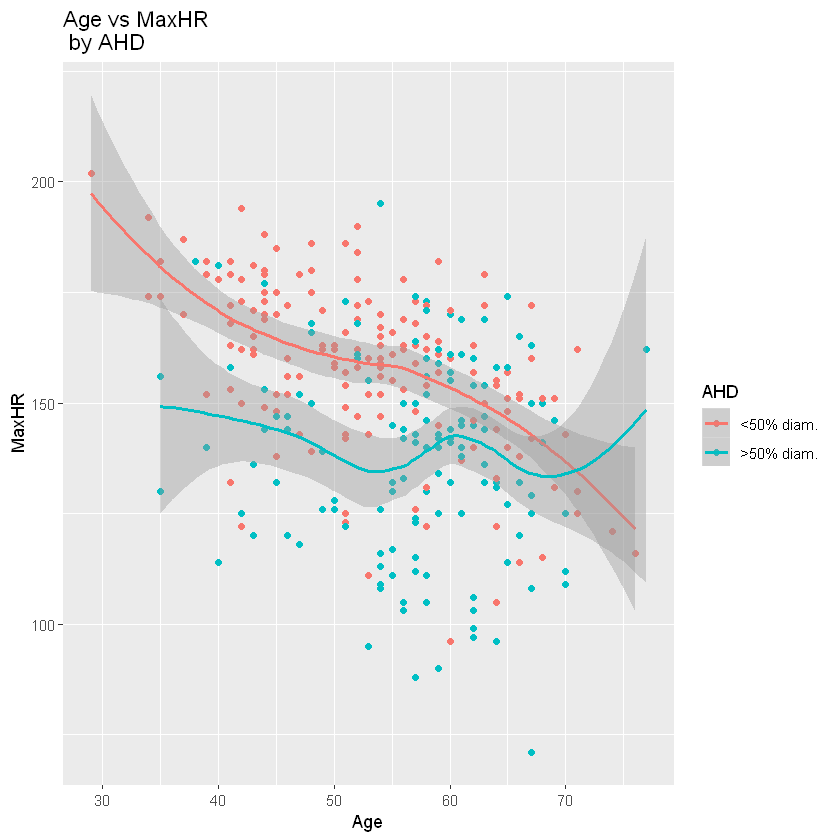

In [10]:
### Plots: variables
library(ggplot2)
ggplot(heart1, aes(x=AHD, y=RestBP, color= ChestPain, size=Oldpeak)) + geom_point() + 
  ggtitle("AHD vs RestBP \n by ChestPain") 
ggplot(heart1, aes(x=Age, y=MaxHR, color=AHD)) + geom_point() + geom_smooth() + 
  ggtitle("Age vs MaxHR \n by AHD")

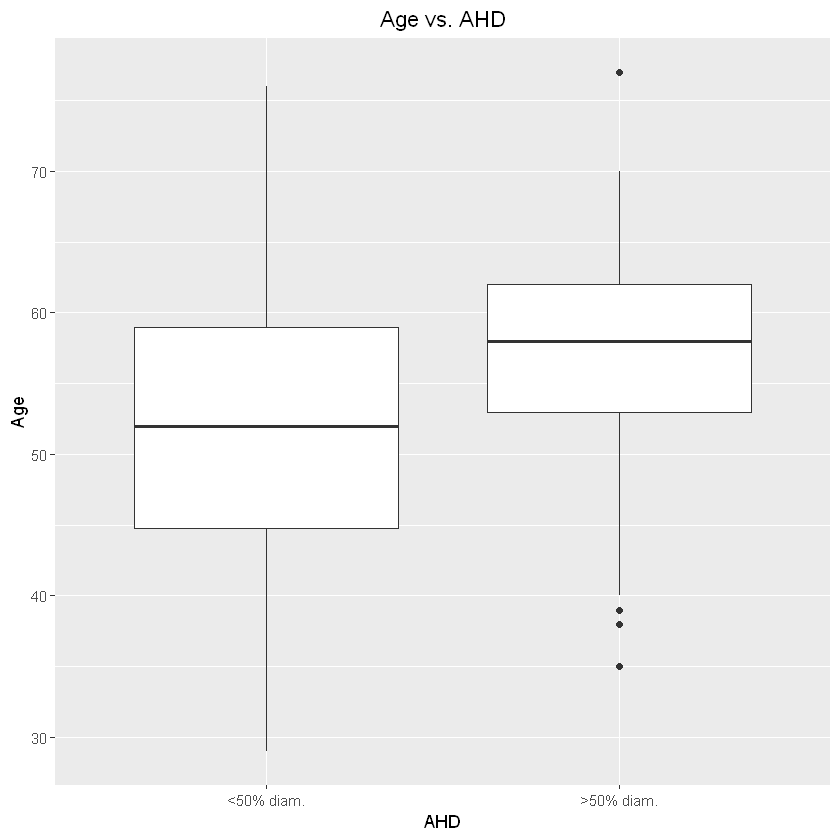

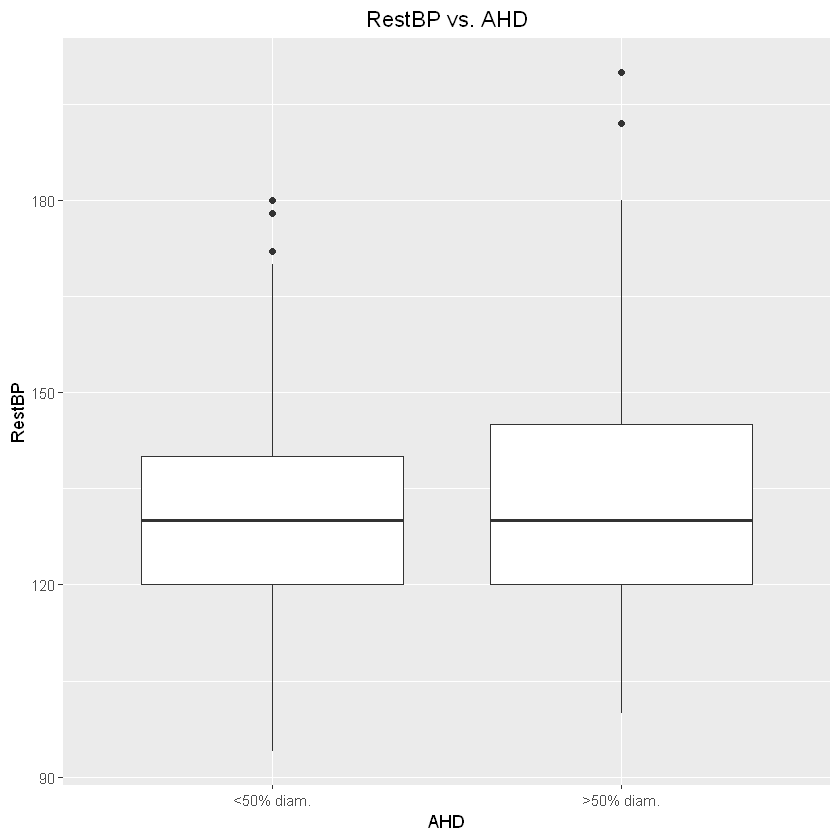

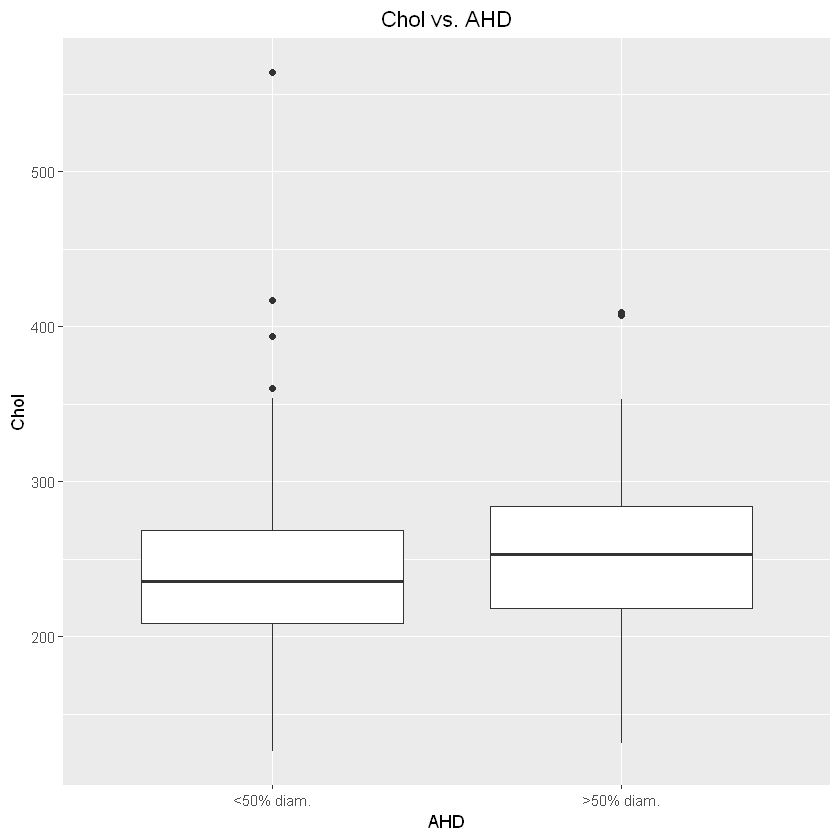

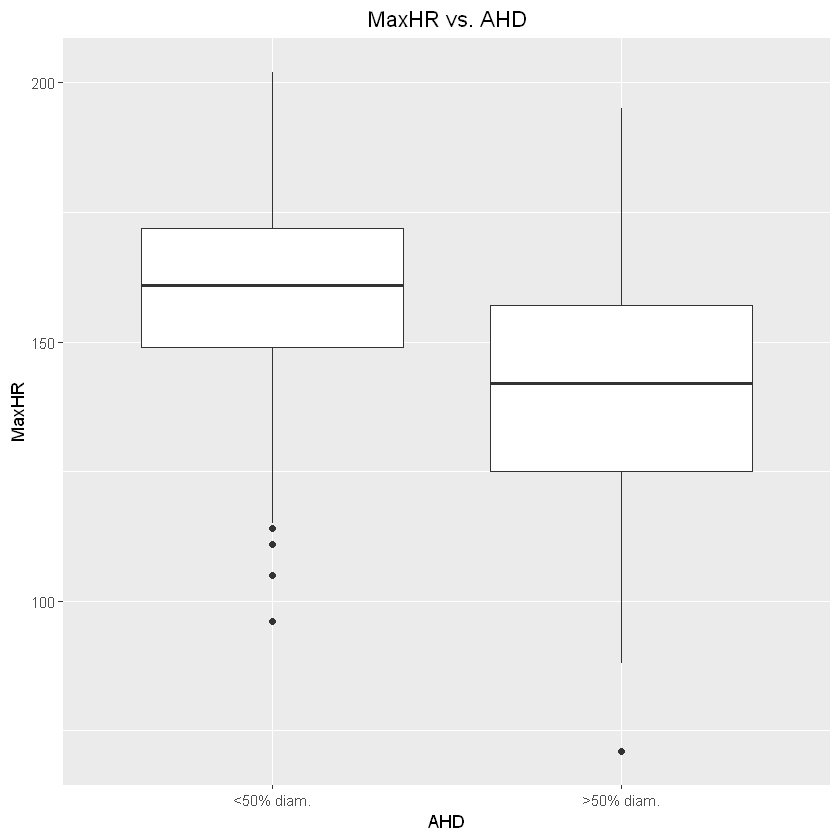

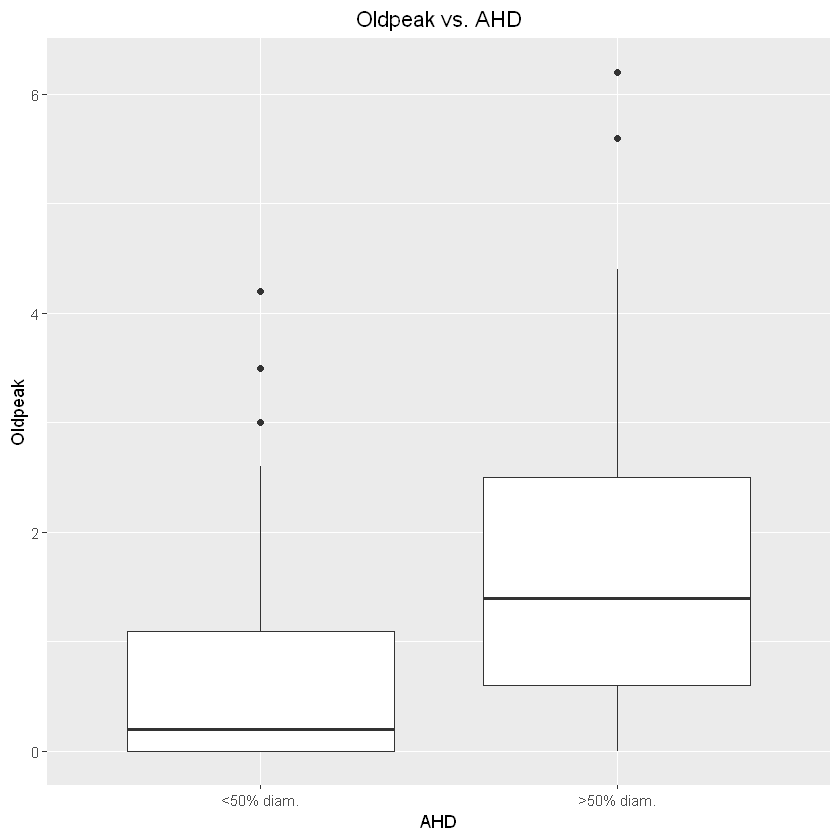

In [11]:
### Box plots 
num <- heart1[,c("Age", "RestBP", "Chol", "MaxHR", "Oldpeak", "AHD")]
for(i in names(num)[-6]){
  plot <- ggplot(num, aes_string("AHD", y = i)) + geom_boxplot() + ggtitle(paste0(i, " vs. AHD")) + 
    theme(plot.title = element_text(hjust = 0.5))
  print(plot)
}

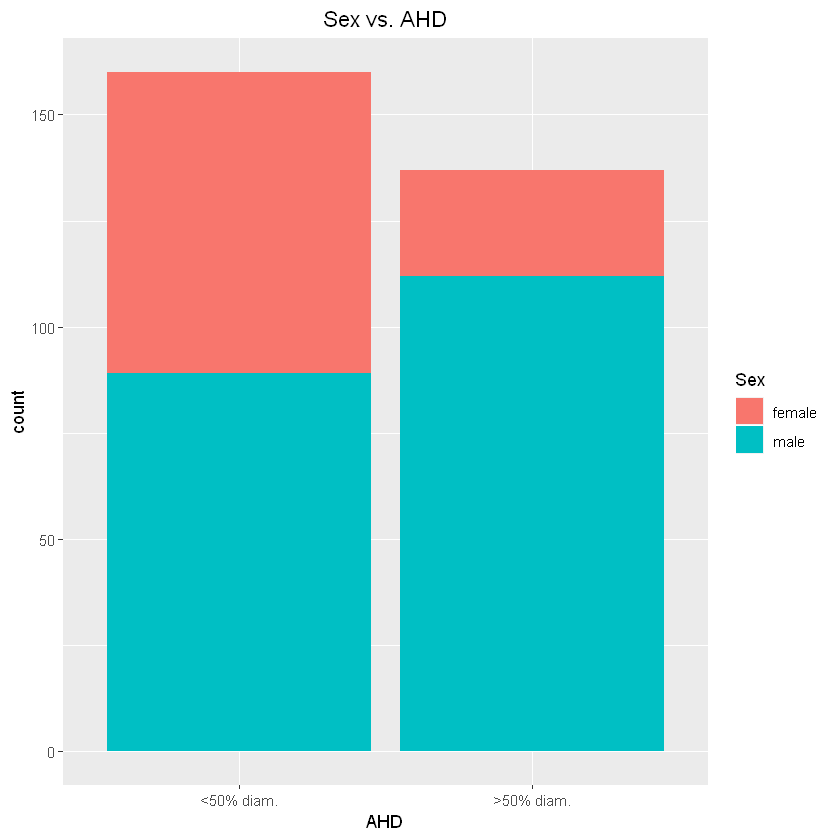

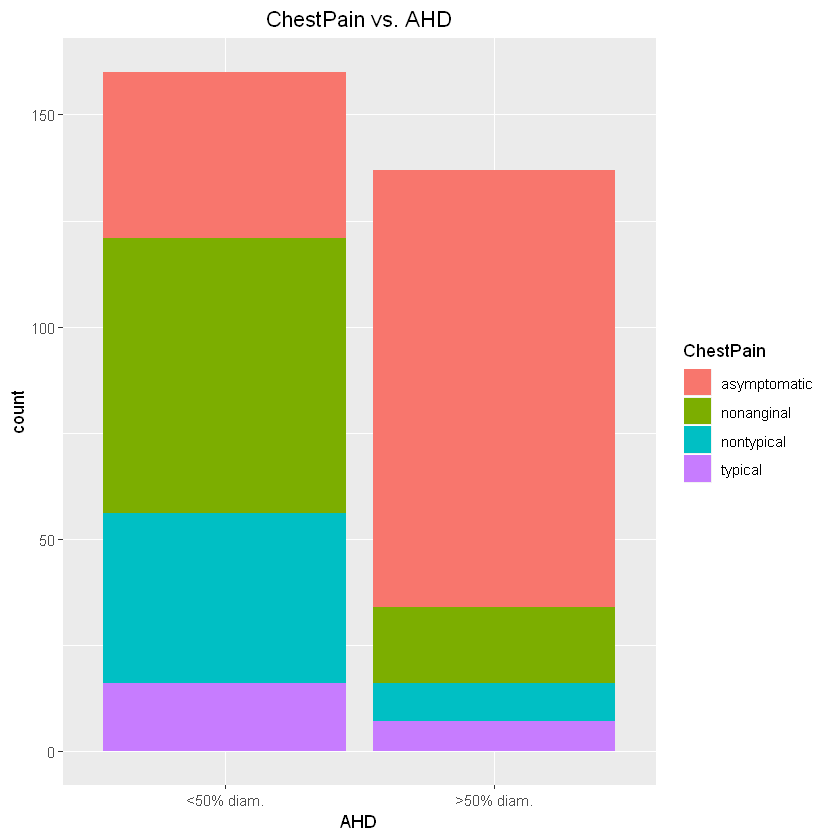

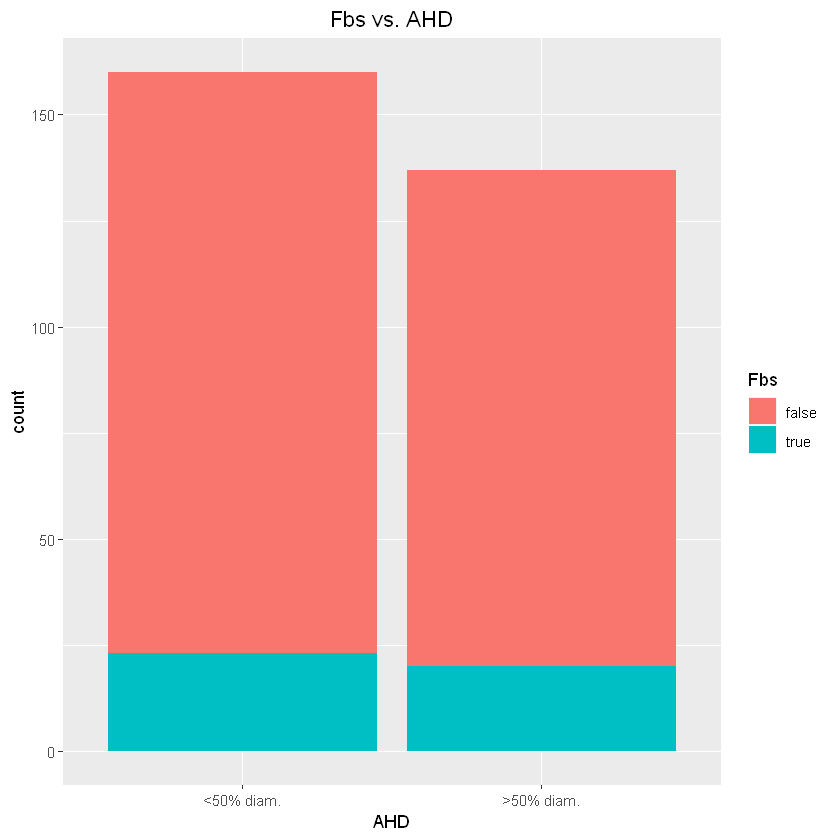

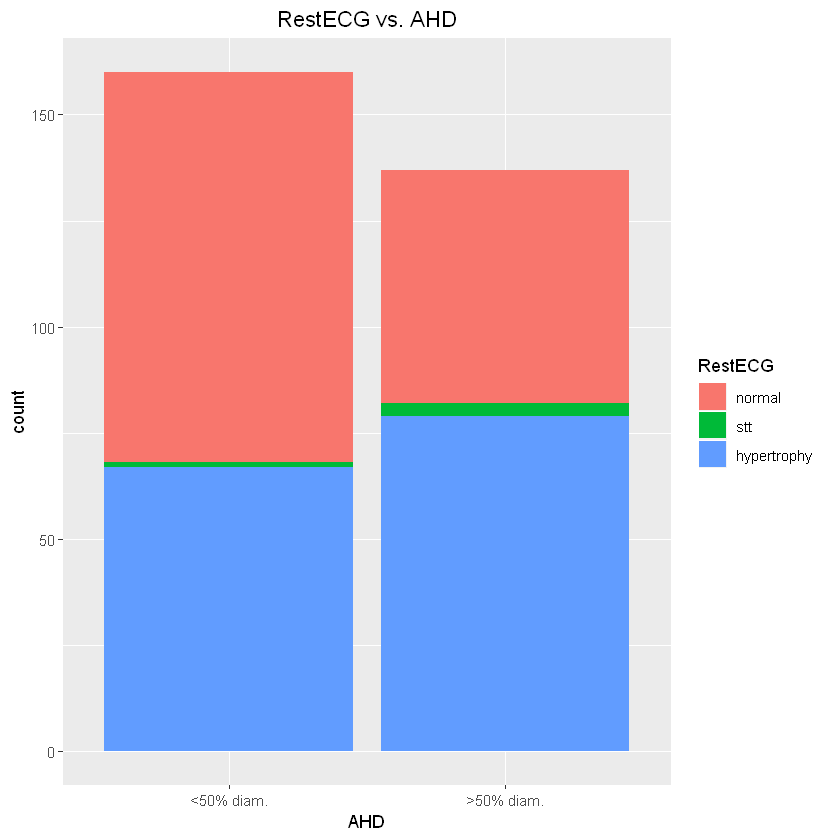

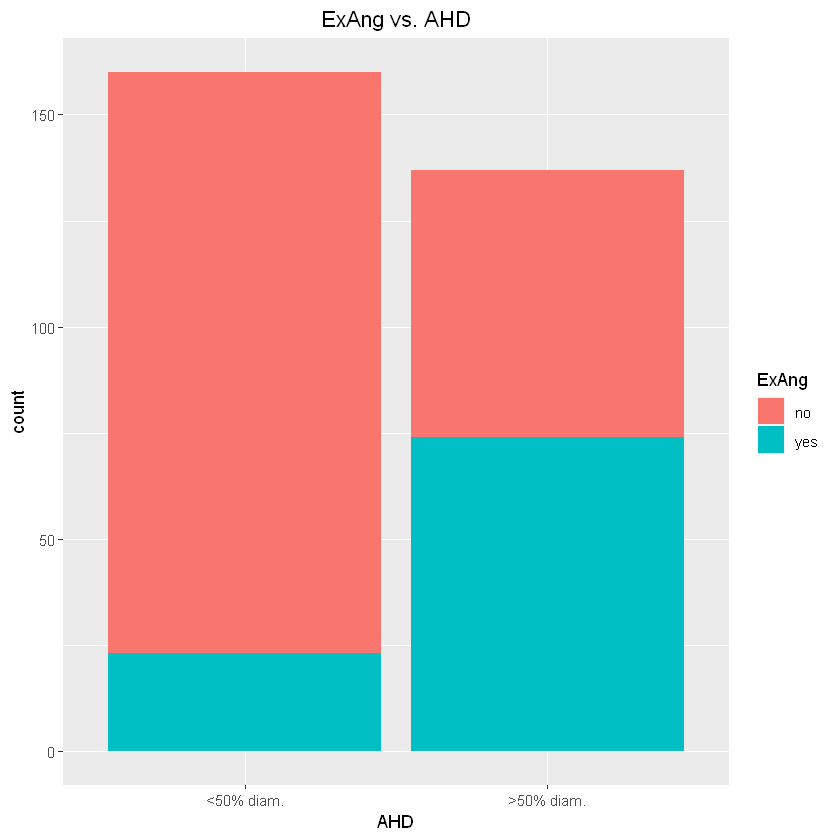

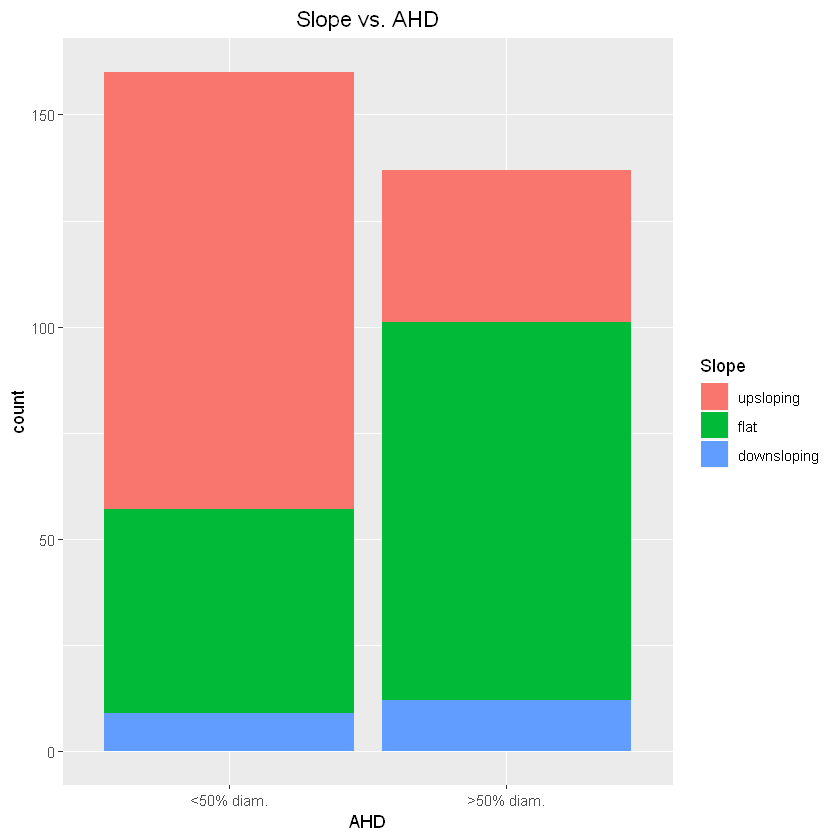

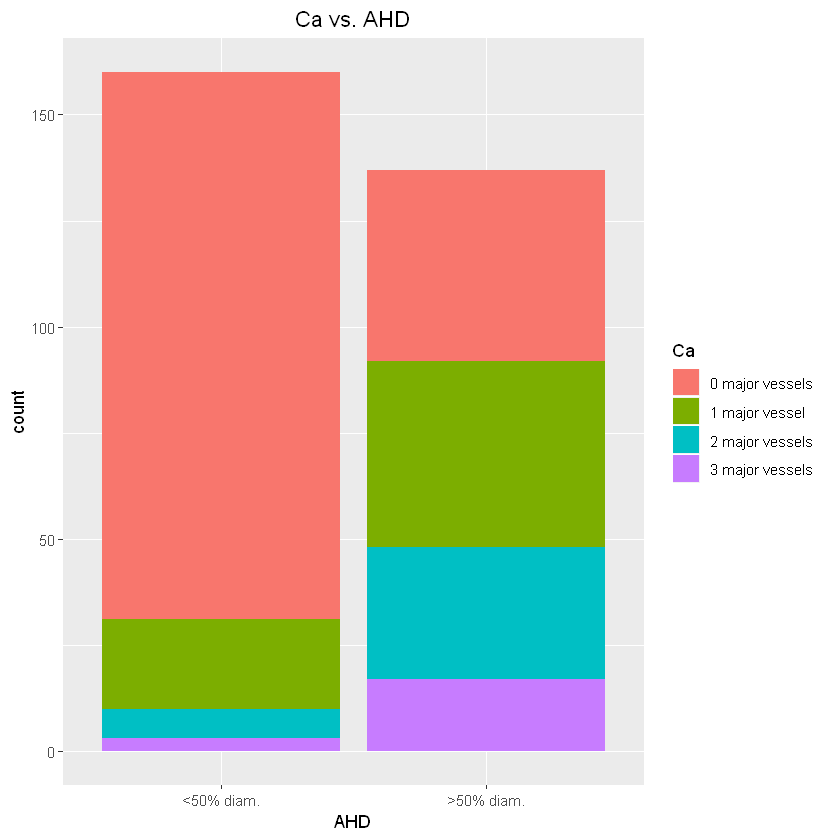

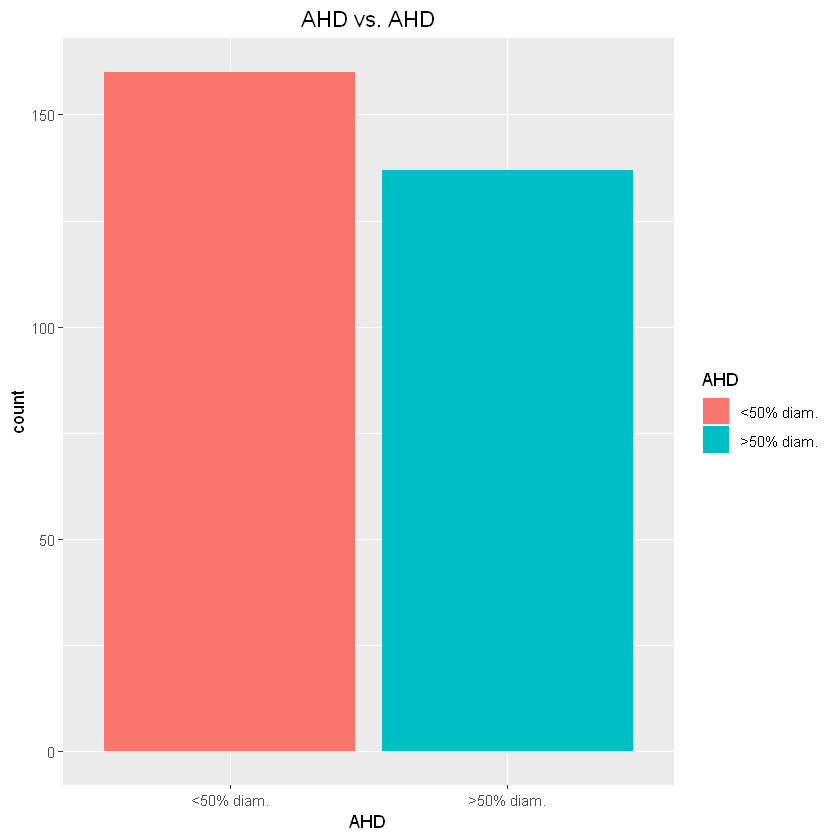

In [12]:
### Bar Chart                 
not_num <- heart1[ , -which(names(heart1) %in% c("Age", "RestBP", "Chol", "MaxHR", "Oldpeak"))]
for(i in names(not_num)[-8]){
  plot <- ggplot(not_num, aes_string("AHD", fill = i)) + geom_bar() + ggtitle(paste0(i, " vs. AHD")) + 
    theme(plot.title = element_text(hjust = 0.5)) 
  print(plot)
} 

In [13]:
### Train & Test Data Sets
set.seed(123)
s <- sample(1:nrow(heart1), nrow(heart1)*0.8,)
train <- heart1[s,]
test <- heart1[-s,]
summary(train) 
summary(test)

      Age            Sex             ChestPain       RestBP     
 Min.   :29.00   female: 74   asymptomatic:111   Min.   : 94.0  
 1st Qu.:47.00   male  :163   nonanginal  : 69   1st Qu.:120.0  
 Median :56.00                nontypical  : 36   Median :130.0  
 Mean   :54.51                typical     : 21   Mean   :131.8  
 3rd Qu.:62.00                                   3rd Qu.:140.0  
 Max.   :77.00                                   Max.   :200.0  
      Chol          Fbs             RestECG        MaxHR       ExAng    
 Min.   :126.0   false:209   normal     :114   Min.   : 71.0   no :161  
 1st Qu.:212.0   true : 28   stt        :  4   1st Qu.:134.0   yes: 76  
 Median :243.0               hypertrophy:119   Median :153.0            
 Mean   :247.2                                 Mean   :150.2            
 3rd Qu.:276.0                                 3rd Qu.:165.0            
 Max.   :564.0                                 Max.   :202.0            
    Oldpeak              Slope    

      Age            Sex            ChestPain      RestBP           Chol      
 Min.   :34.00   female:22   asymptomatic:31   Min.   :100.0   Min.   :160.0  
 1st Qu.:49.00   male  :38   nonanginal  :14   1st Qu.:120.0   1st Qu.:210.8  
 Median :55.00               nontypical  :13   Median :130.0   Median :242.0  
 Mean   :54.67               typical     : 2   Mean   :131.2   Mean   :248.1  
 3rd Qu.:60.00                                 3rd Qu.:140.0   3rd Qu.:276.0  
 Max.   :71.00                                 Max.   :172.0   Max.   :354.0  
    Fbs            RestECG       MaxHR       ExAng       Oldpeak      
 false:45   normal     :33   Min.   : 88.0   no :39   Min.   :0.0000  
 true :15   stt        : 0   1st Qu.:132.8   yes:21   1st Qu.:0.0000  
            hypertrophy:27   Median :153.5            Median :0.6500  
                             Mean   :147.4            Mean   :0.9117  
                             3rd Qu.:166.0            3rd Qu.:1.4500  
                     

In [14]:
### Accuracy Function for models   
acc <- function(x){
  w <- sum(diag(x))/ sum(x)*100
  return(w)
}

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  1.4.2     v purrr   0.2.5
v tidyr   0.8.1     v dplyr   0.7.6
v readr   1.1.1     v stringr 1.3.1
v tibble  1.4.2     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var




Call:
glm(formula = AHD ~ Age, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6209  -1.1111  -0.8038   1.1378   1.6499  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.82791    0.82708  -3.419 0.000628 ***
Age          0.05038    0.01490   3.380 0.000724 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 328.21  on 236  degrees of freedom
Residual deviance: 316.04  on 235  degrees of freedom
AIC: 320.04

Number of Fisher Scoring iterations: 4


    Actual
Pred <50% diam. >50% diam.
   0         78         46
   1         45         68


Call:
glm(formula = AHD ~ Sex, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3335  -1.3335  -0.7466   1.0290   1.6815  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.1350     0.2709  -4.189 2.80e-05 ***
Sexmale       1.4946     0.3143   4.756 1.97e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 328.21  on 236  degrees of freedom
Residual deviance: 302.89  on 235  degrees of freedom
AIC: 306.89

Number of Fisher Scoring iterations: 4


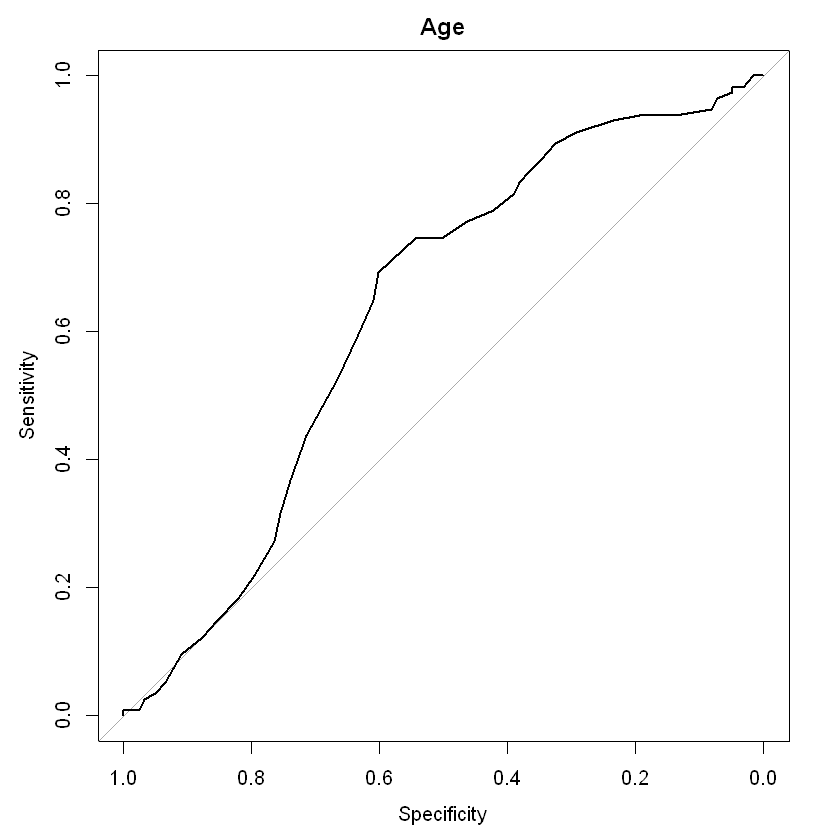

    Actual
Pred <50% diam. >50% diam.
   0         56         18
   1         67         96


Call:
glm(formula = AHD ~ ChestPain, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6176  -0.7585  -0.7521   0.7938   1.6739  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)           0.9933     0.2137   4.647 3.36e-06 ***
ChestPainnonanginal  -2.1113     0.3518  -6.002 1.95e-09 ***
ChestPainnontypical  -2.0919     0.4403  -4.751 2.02e-06 ***
ChestPaintypical     -1.6864     0.5099  -3.308 0.000941 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 328.21  on 236  degrees of freedom
Residual deviance: 273.81  on 233  degrees of freedom
AIC: 281.81

Number of Fisher Scoring iterations: 4


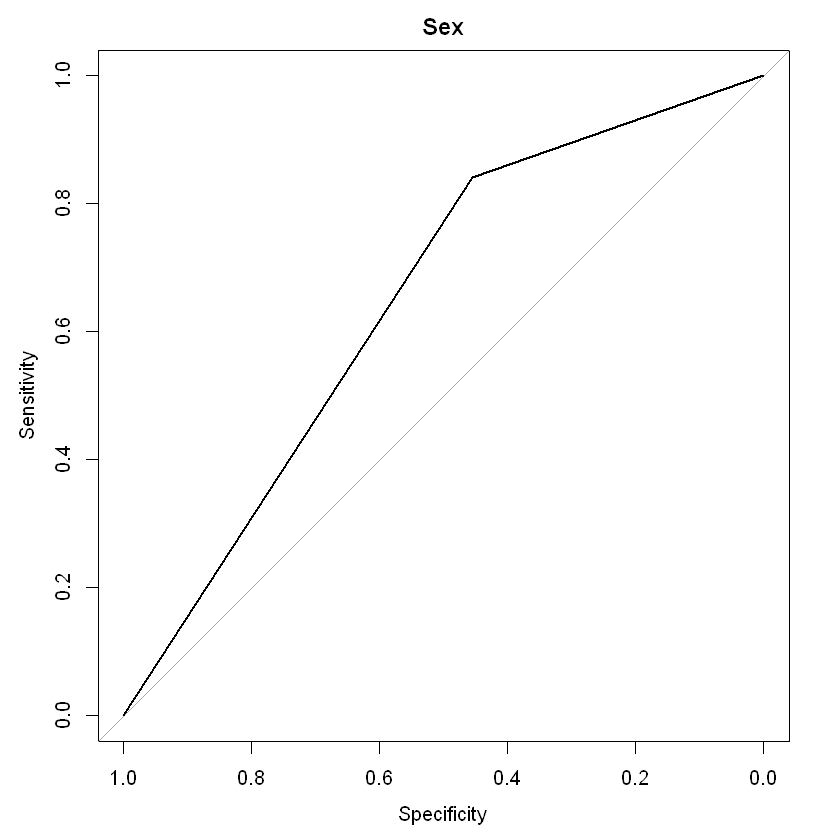

    Actual
Pred <50% diam. >50% diam.
   0         93         33
   1         30         81


Call:
glm(formula = AHD ~ RestBP, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4689  -1.1335  -0.9605   1.2088   1.4247  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept) -2.100216   0.966603  -2.173   0.0298 *
RestBP       0.015354   0.007267   2.113   0.0346 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 328.21  on 236  degrees of freedom
Residual deviance: 323.60  on 235  degrees of freedom
AIC: 327.6

Number of Fisher Scoring iterations: 4


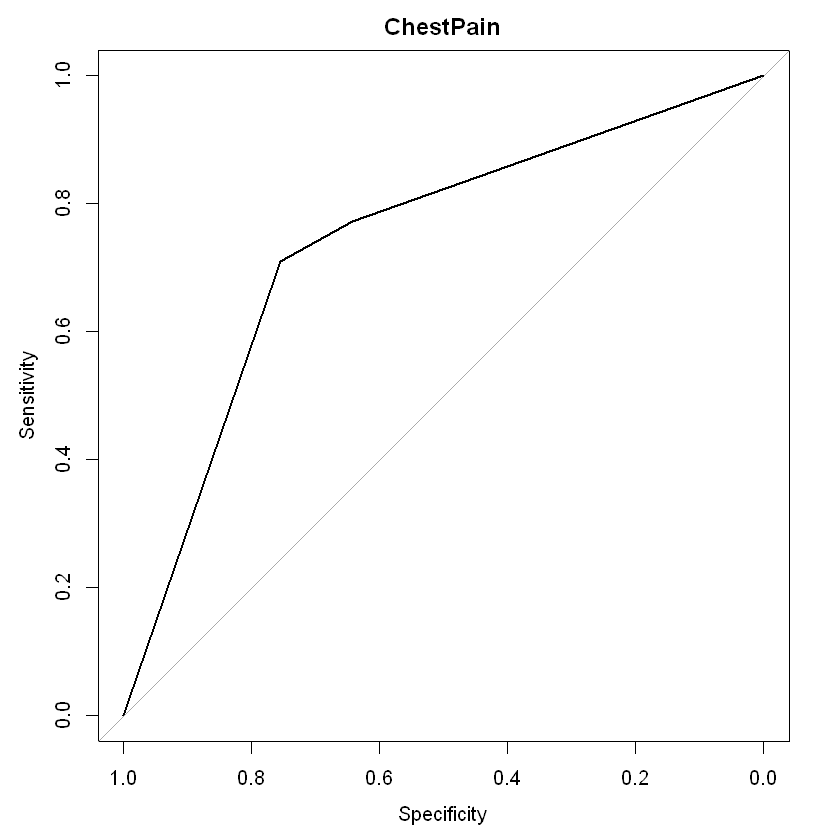

    Actual
Pred <50% diam. >50% diam.
   0         82         66
   1         41         48


Call:
glm(formula = AHD ~ Chol, family = "binomial", data = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.393  -1.140  -1.086   1.205   1.301  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.520826   0.624475  -0.834    0.404
Chol         0.001800   0.002471   0.728    0.466

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 328.21  on 236  degrees of freedom
Residual deviance: 327.68  on 235  degrees of freedom
AIC: 331.68

Number of Fisher Scoring iterations: 3


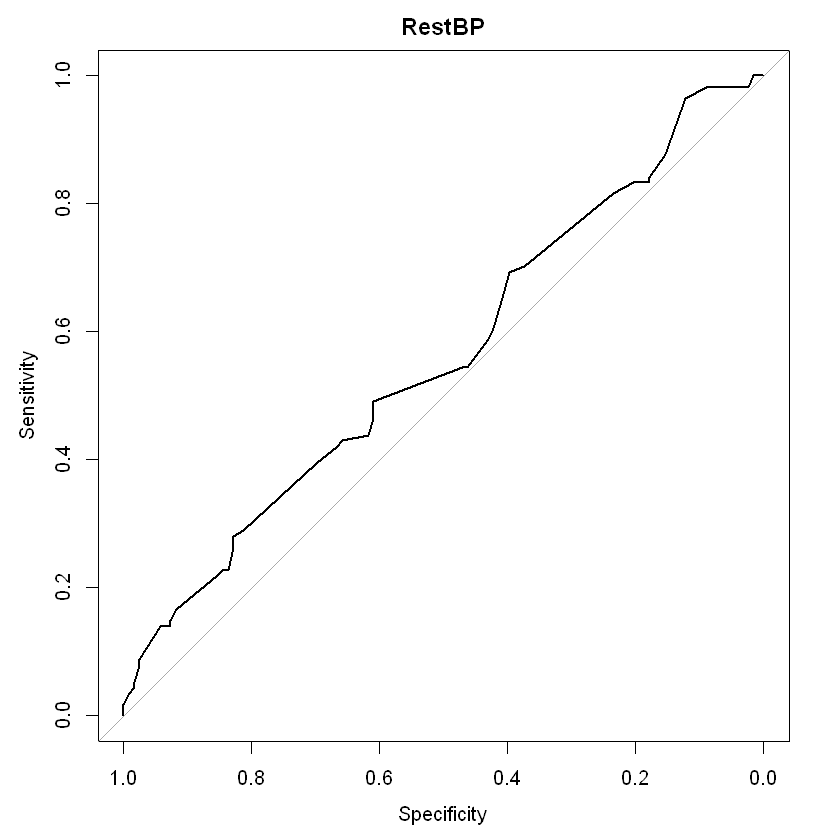

    Actual
Pred <50% diam. >50% diam.
   0        102         93
   1         21         21


Call:
glm(formula = AHD ~ Fbs, family = "binomial", data = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.177  -1.141  -1.141   1.214   1.214  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.08618    0.13847  -0.622    0.534
Fbstrue      0.08618    0.40253   0.214    0.830

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 328.21  on 236  degrees of freedom
Residual deviance: 328.16  on 235  degrees of freedom
AIC: 332.16

Number of Fisher Scoring iterations: 3


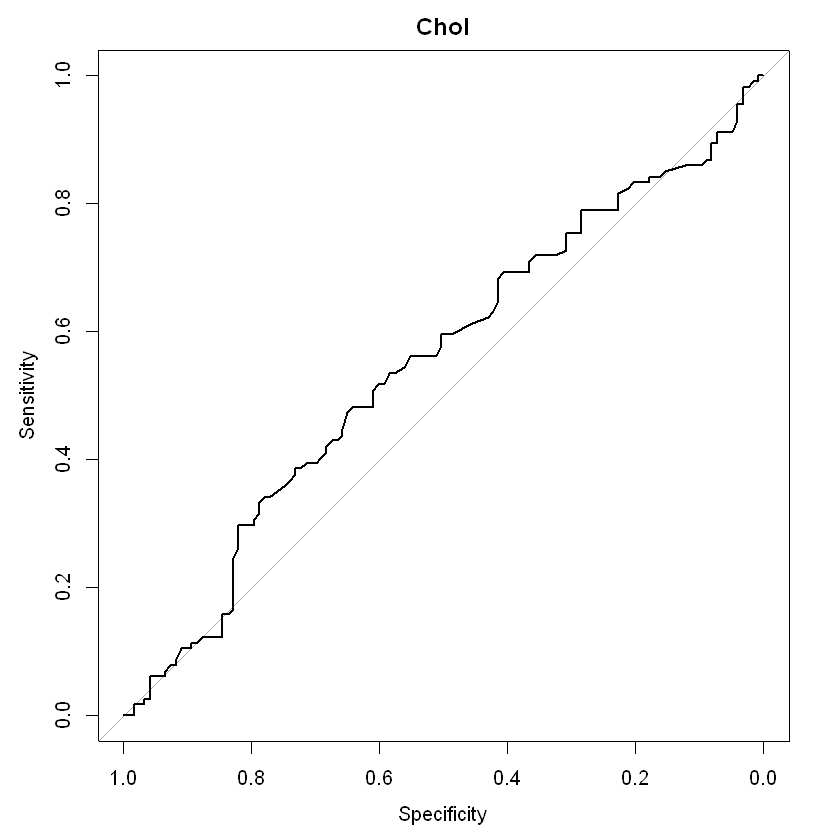

    Actual
Pred <50% diam. >50% diam.
   0        123        114


Call:
glm(formula = AHD ~ RestECG, family = "binomial", data = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.665  -1.031  -1.031   1.114   1.331  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)  
(Intercept)         -0.3545     0.1903  -1.863   0.0624 .
RestECGstt           1.4532     1.1703   1.242   0.2143  
RestECGhypertrophy   0.5061     0.2646   1.913   0.0558 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 328.21  on 236  degrees of freedom
Residual deviance: 323.30  on 234  degrees of freedom
AIC: 329.3

Number of Fisher Scoring iterations: 4


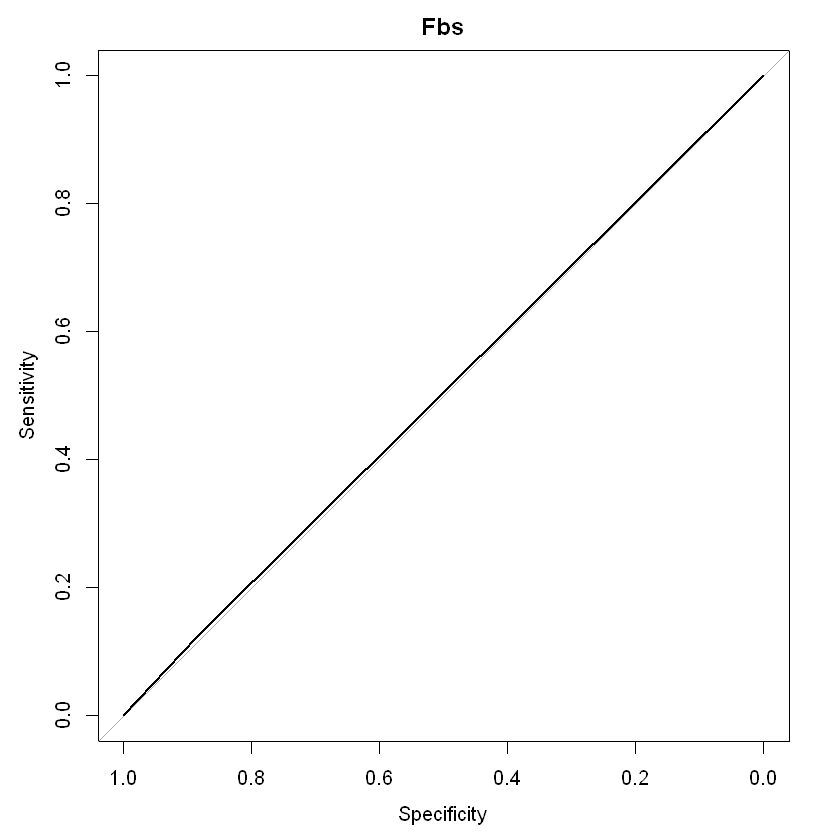

    Actual
Pred <50% diam. >50% diam.
   0         67         47
   1         56         67


Call:
glm(formula = AHD ~ MaxHR, family = "binomial", data = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.999  -0.979  -0.597   1.061   2.052  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  6.317145   1.129113   5.595 2.21e-08 ***
MaxHR       -0.042522   0.007424  -5.728 1.02e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 328.21  on 236  degrees of freedom
Residual deviance: 286.97  on 235  degrees of freedom
AIC: 290.97

Number of Fisher Scoring iterations: 4


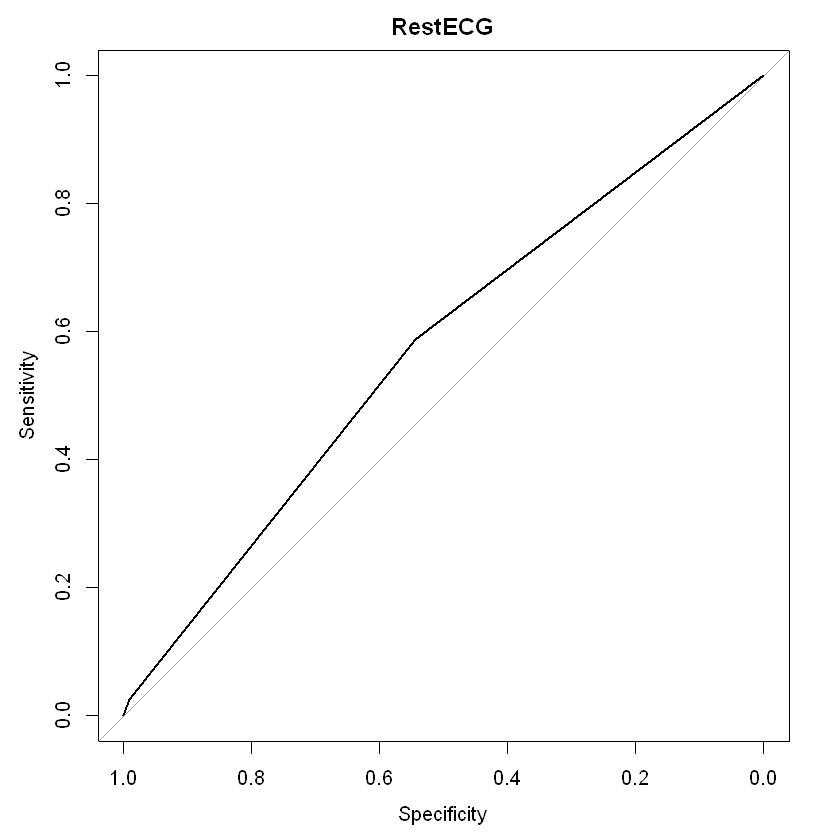

    Actual
Pred <50% diam. >50% diam.
   0         94         43
   1         29         71


Call:
glm(formula = AHD ~ ExAng, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7653  -0.9040  -0.9040   0.6876   1.4781  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.6838     0.1669  -4.097 4.19e-05 ***
ExAngyes      2.0056     0.3272   6.130 8.77e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 328.21  on 236  degrees of freedom
Residual deviance: 283.64  on 235  degrees of freedom
AIC: 287.64

Number of Fisher Scoring iterations: 4


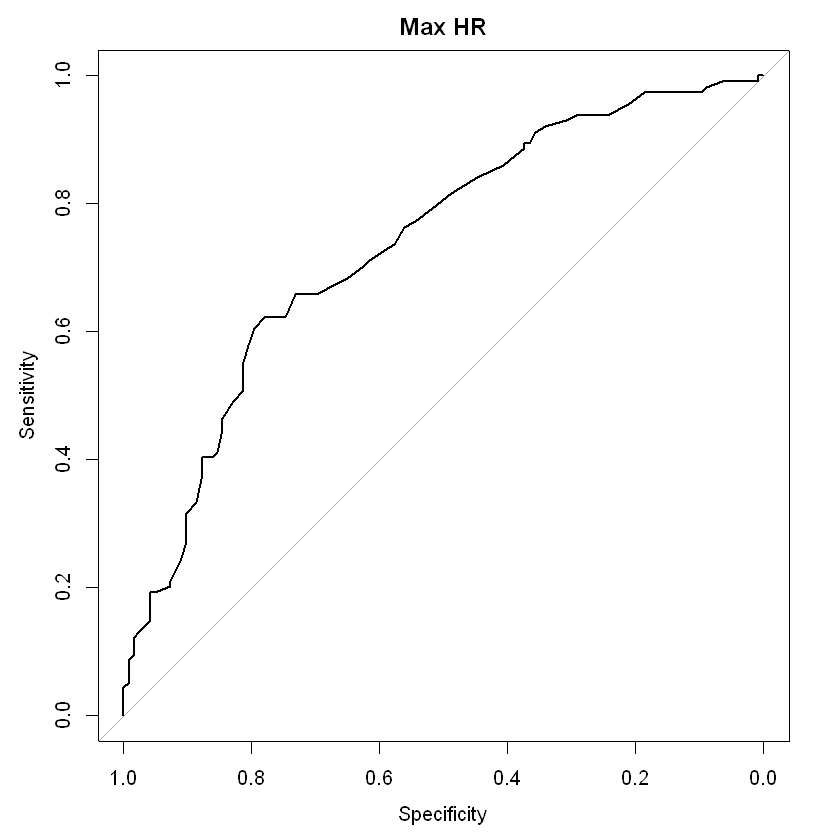

    Actual
Pred <50% diam. >50% diam.
   0        107         54
   1         16         60


Call:
glm(formula = AHD ~ Oldpeak, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3441  -0.8642  -0.8031   1.0383   1.6054  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.9662     0.1986  -4.864 1.15e-06 ***
Oldpeak       0.8685     0.1486   5.845 5.08e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 328.21  on 236  degrees of freedom
Residual deviance: 281.78  on 235  degrees of freedom
AIC: 285.78

Number of Fisher Scoring iterations: 4


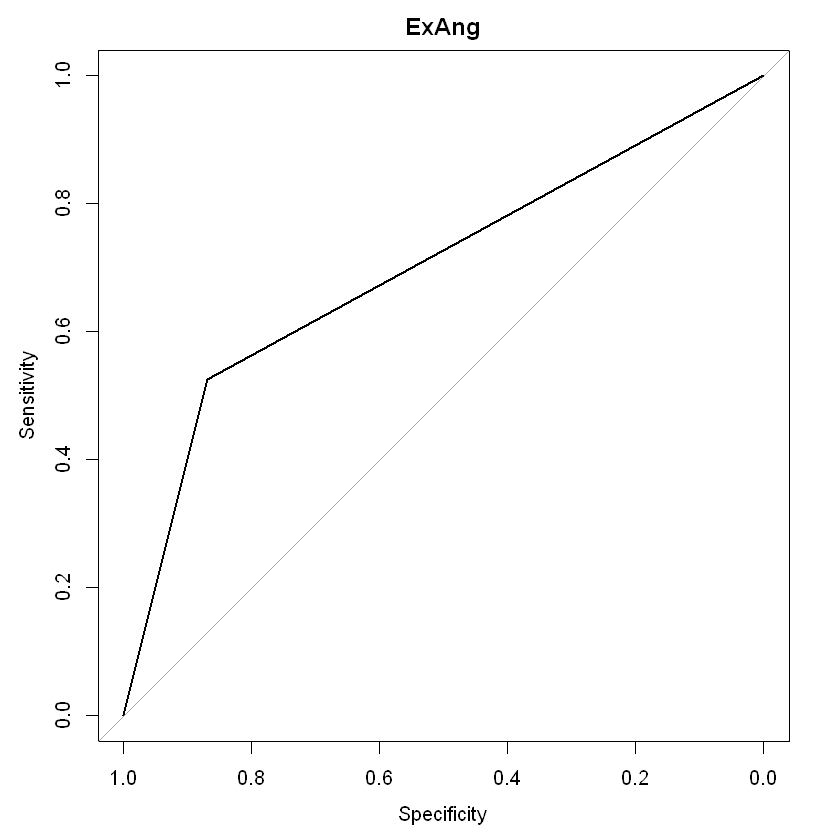

    Actual
Pred <50% diam. >50% diam.
   0         94         47
   1         29         67


Call:
glm(formula = AHD ~ Slope, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5007  -0.7832  -0.7832   0.8855   1.6317  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -1.0245     0.2203  -4.650 3.31e-06 ***
Slopeflat          1.7585     0.2994   5.873 4.28e-09 ***
Slopedownsloping   1.2252     0.5006   2.448   0.0144 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 328.21  on 236  degrees of freedom
Residual deviance: 289.80  on 234  degrees of freedom
AIC: 295.8

Number of Fisher Scoring iterations: 4


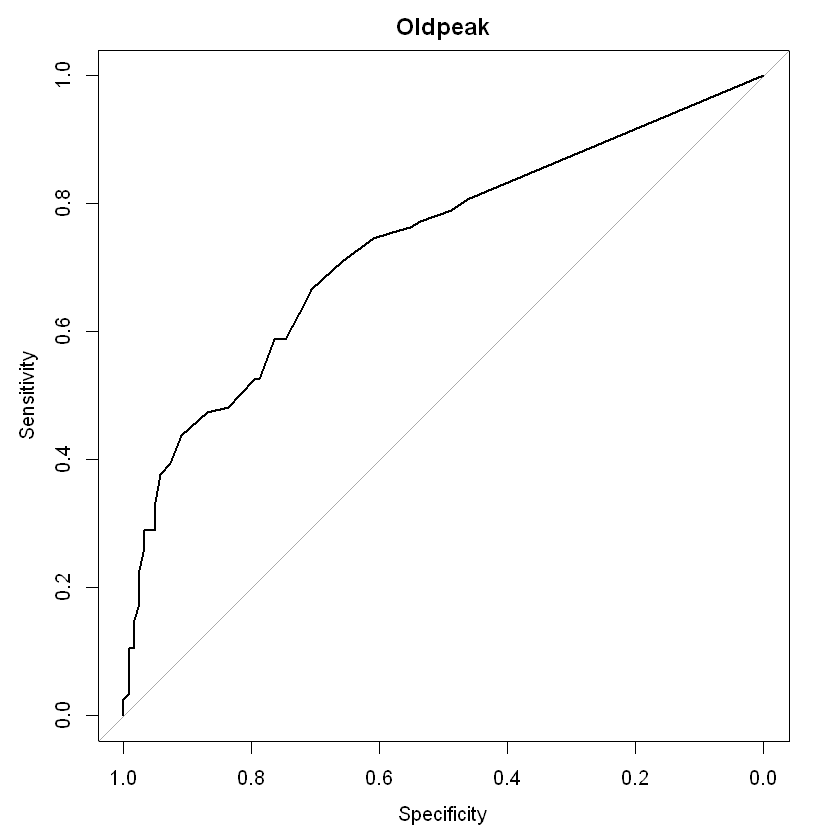

    Actual
Pred <50% diam. >50% diam.
   0         78         28
   1         45         86


Call:
glm(formula = AHD ~ Ca, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9103  -0.8075  -0.8075   0.9104   1.5996  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -0.9534     0.1935  -4.927 8.34e-07 ***
Ca1 major vessel    1.6199     0.3422   4.734 2.20e-06 ***
Ca2 major vessels   2.6021     0.5253   4.954 7.28e-07 ***
Ca3 major vessels   2.4939     0.6650   3.750 0.000177 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 328.21  on 236  degrees of freedom
Residual deviance: 272.25  on 233  degrees of freedom
AIC: 280.25

Number of Fisher Scoring iterations: 4


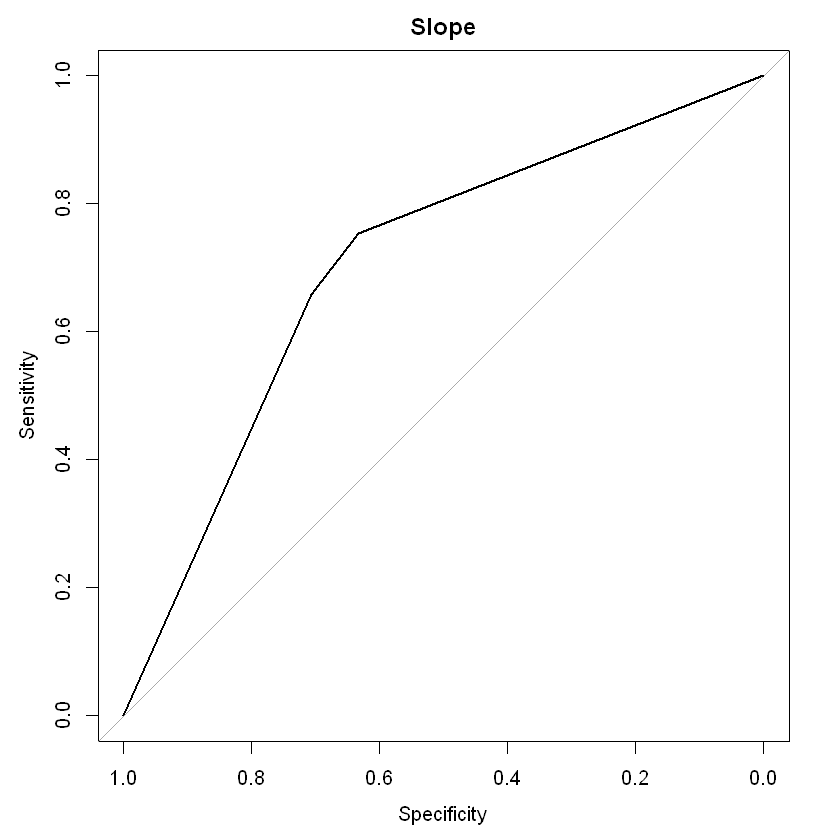

    Actual
Pred <50% diam. >50% diam.
   0         96         37
   1         27         77


Call:
glm(formula = AHD ~ Thal, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7189  -0.7653  -0.7653   0.7199   1.6559  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)   
(Intercept)      0.6931     0.5477   1.266   0.2057   
Thalnormal      -1.7714     0.5836  -3.035   0.0024 **
Thalreversable   0.5250     0.6014   0.873   0.3827   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 328.21  on 236  degrees of freedom
Residual deviance: 265.23  on 234  degrees of freedom
AIC: 271.23

Number of Fisher Scoring iterations: 4


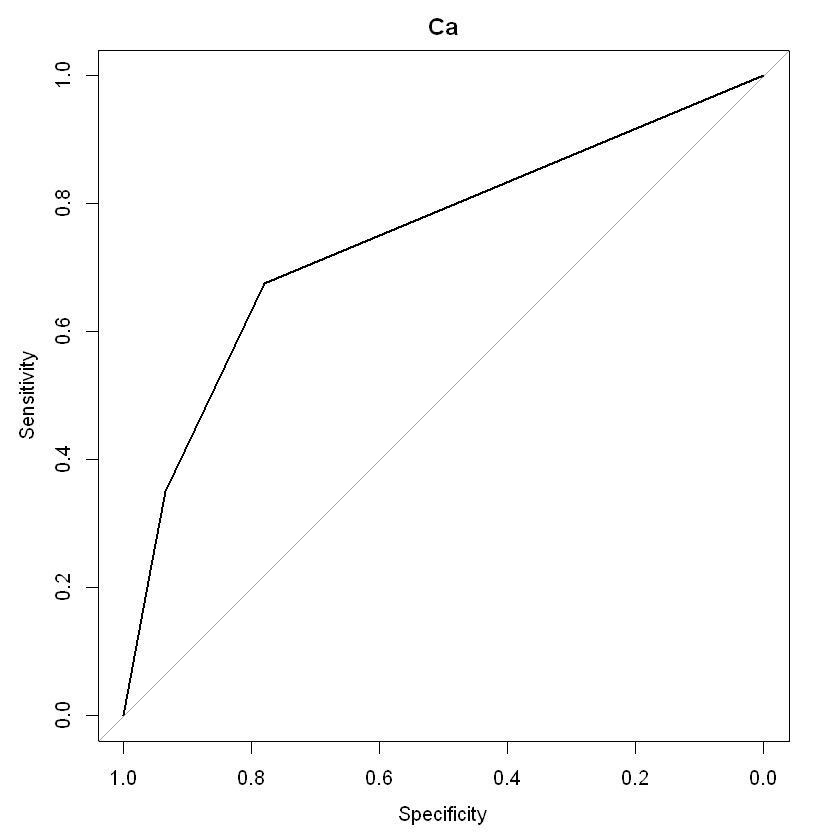

    Actual
Pred <50% diam. >50% diam.
   0         97         33
   1         26         81

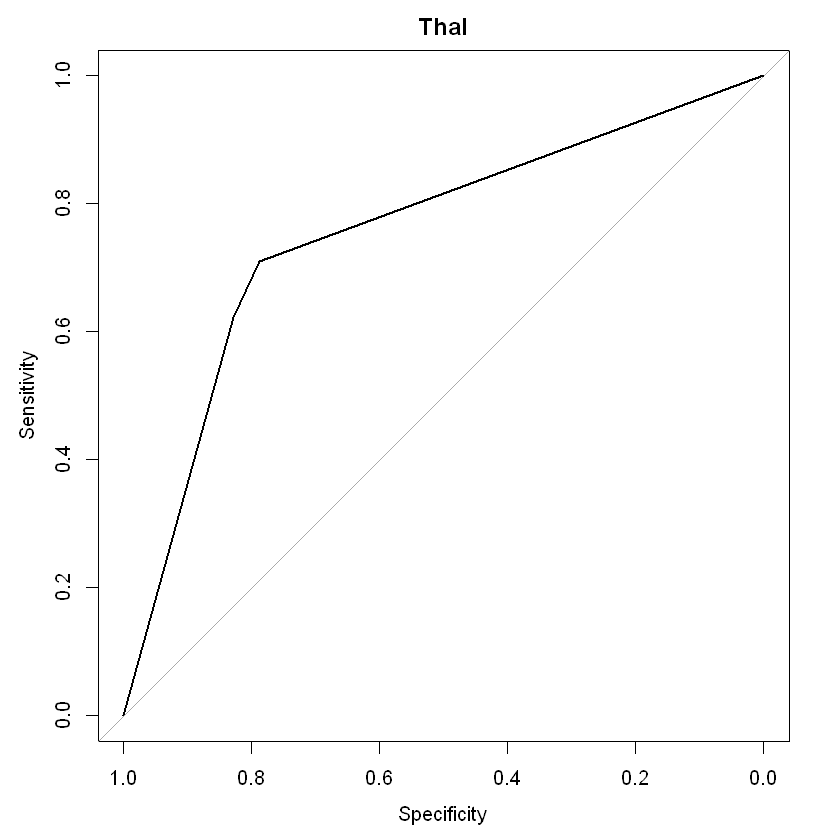

In [15]:
### Individual logistic regression
library(tidyverse)
library(broom)
library(pROC)
trainAge <- glm(AHD ~ Age, data=train, family='binomial') 
summary(trainAge)
pred_age <- predict(trainAge, train, type = "response")
roccurve_age <- roc(train$AHD ~ pred_age)
plot(roccurve_age, main = "Age")
pred2_age <- ifelse(pred_age > 0.5, 1,0)
tab_age <- table(Pred = pred2_age, Actual = train$AHD)
tab_age
##############
trainSex <- glm(AHD ~ Sex, data=train, family='binomial') 
summary(trainSex)
pred_sex <- predict(trainSex, train, type = "response")
roccurve_sex <- roc(train$AHD ~ pred_sex)
plot(roccurve_sex, main = "Sex")
pred2_sex <- ifelse(pred_sex > 0.5, 1,0)
tab_sex <- table(Pred = pred2_sex, Actual = train$AHD)
tab_sex 
##############
trainChestPain <- glm(AHD ~ ChestPain, data=train, family='binomial') 
summary(trainChestPain)
pred_cp <- predict(trainChestPain, train, type = "response")
roccurve_cp <- roc(train$AHD ~ pred_cp)
plot(roccurve_cp, main = "ChestPain")
pred2_cp <- ifelse(pred_cp > 0.5, 1,0)
tab_cp <- table(Pred = pred2_cp, Actual = train$AHD)
tab_cp
##############
trainRestBP <- glm(AHD ~ RestBP, data=train, family='binomial') 
summary(trainRestBP)
pred_rbp <- predict(trainRestBP, train, type = "response")
roccurve_rbp <- roc(train$AHD ~ pred_rbp)
plot(roccurve_rbp, main = "RestBP")
pred2_rbp <- ifelse(pred_rbp > 0.5, 1,0)
tab_rbp <- table(Pred = pred2_rbp, Actual = train$AHD)
tab_rbp
##############
trainChol <- glm(AHD ~ Chol, data=train, family='binomial') 
summary(trainChol)
pred_chol <- predict(trainChol, train, type = "response")
roccurve_chol <- roc(train$AHD ~ pred_chol)
plot(roccurve_chol, main = "Chol")
pred2_chol <- ifelse(pred_chol > 0.5, 1,0)
tab_chol <- table(Pred = pred2_chol, Actual = train$AHD)
tab_chol 
##############
trainFbs <- glm(AHD ~ Fbs, data=train, family='binomial') 
summary(trainFbs)
pred_fbs <- predict(trainFbs, train, type = "response")
roccurve_fbs <- roc(train$AHD ~ pred_fbs)
plot(roccurve_fbs, main = "Fbs")
pred2_fbs <- ifelse(pred_fbs > 0.5, 1,0)
tab_fbs <- table(Pred = pred2_fbs, Actual = train$AHD)
tab_fbs 
##############
trainRestECG <- glm(AHD ~ RestECG, data=train, family='binomial') 
summary(trainRestECG)
pred_ecg <- predict(trainRestECG, train, type = "response")
roccurve_ecg <- roc(train$AHD ~ pred_ecg)
plot(roccurve_ecg, main = "RestECG")
pred2_ecg <- ifelse(pred_ecg > 0.5, 1,0)
tab_ecg <- table(Pred = pred2_ecg, Actual = train$AHD)
tab_ecg 
##############
trainMaxHR <- glm(AHD ~ MaxHR, data=train, family='binomial') 
summary(trainMaxHR)
pred_hr <- predict(trainMaxHR, train, type = "response")
roccurve_hr <- roc(train$AHD ~ pred_hr)
plot(roccurve_hr, main = "Max HR")
pred2_hr <- ifelse(pred_hr > 0.5, 1,0)
tab_hr <- table(Pred = pred2_hr, Actual = train$AHD)
tab_hr 
##############
trainExAng <- glm(AHD ~ ExAng, data=train, family='binomial') 
summary(trainExAng)
pred_ang <- predict(trainExAng, train, type = "response")
roccurve_ang <- roc(train$AHD ~ pred_ang)
plot(roccurve_ang, main = "ExAng")
pred2_ang <- ifelse(pred_ang > 0.5, 1,0)
tab_ang <- table(Pred = pred2_ang, Actual = train$AHD)
tab_ang 
##############
trainOldpeak <- glm(AHD ~ Oldpeak, data=train, family='binomial') 
summary(trainOldpeak)
pred_op <- predict(trainOldpeak, train, type = "response")
roccurve_op <- roc(train$AHD ~ pred_op)
plot(roccurve_op, main = "Oldpeak")
pred2_op <- ifelse(pred_op > 0.5, 1,0)
tab_op <- table(Pred = pred2_op, Actual = train$AHD)
tab_op 
##############
trainSlope <- glm(AHD ~ Slope, data=train, family='binomial') 
summary(trainSlope)
pred_sp <- predict(trainSlope, train, type = "response")
roccurve_sp <- roc(train$AHD ~ pred_sp)
plot(roccurve_sp, main = "Slope")
pred2_sp <- ifelse(pred_sp > 0.5, 1,0)
tab_sp <- table(Pred = pred2_sp, Actual = train$AHD)
tab_sp 
##############
trainCa <- glm(AHD ~ Ca, data=train, family='binomial') 
summary(trainCa)
pred_ca <- predict(trainCa, train, type = "response")
roccurve_ca <- roc(train$AHD ~ pred_ca)
plot(roccurve_ca, main = "Ca")
pred2_ca <- ifelse(pred_ca > 0.5, 1,0)
tab_ca <- table(Pred = pred2_ca, Actual = train$AHD)
tab_ca 
##############
trainThal <- glm(AHD ~ Thal, data=train, family='binomial') 
summary(trainThal)
pred_t <- predict(trainThal, train, type = "response")
roccurve_t <- roc(train$AHD ~ pred_t)
plot(roccurve_t, main = "Thal")
pred2_t <- ifelse(pred_t > 0.5, 1,0)
tab_t <- table(Pred = pred2_t, Actual = train$AHD)
tab_t 

In [16]:
### Models 
model <- glm(AHD ~., data = train, family = "binomial")
summary(model)
pred <- predict(model, train, type = "response")
roccurve <- roc(train$AHD ~ pred)
pred1 <- ifelse(pred > 0.5, 1,0)
tab1 <- table(Pred = pred1, Actual = train$AHD)
## Used stepwise regression to get our best models 
# Model with the lowest AIC 
step(model, scope = list(upper = model), direction = "backward")
#########################
## Model 2
model2 <- glm(AHD ~ Age + Sex + ChestPain + RestBP + Chol + Fbs + MaxHR + ExAng + 
                Oldpeak + Slope + Ca + Thal , data = train, family = "binomial")
summary(model2)  
pred2 <- predict(model2, train, type = "response")
roccurve2 <- roc(train$AHD ~ pred2)
pred2 <- ifelse(pred2 > 0.5, 1,0)
tab2 <- table(Pred = pred2, Actual = train$AHD)
#########################
# Model 3
model3 <- glm(AHD ~ Sex + ChestPain + RestBP + Chol + Fbs + MaxHR + ExAng + 
                Oldpeak + Slope + Ca + Thal,data =  train, family = "binomial")
summary(model3)
pred3 <- predict(model3, train, type = "response")
roccurve3 <- roc(train$AHD ~ pred3)
pred3 <- ifelse(pred3 > 0.5, 1,0)
tab3 <- table(Pred = pred3, Actual = train$AHD)
#########################
# Model 4
model4 <- glm(AHD ~ Sex + ChestPain + RestBP + Fbs + MaxHR + ExAng + Oldpeak + 
                Slope + Ca + Thal, data = train, family = "binomial")
summary(model4)
pred4 <- predict(model4, train, type = "response")
roccurve4 <- roc(train$AHD ~ pred4)
pred4 <- ifelse(pred4 > 0.5, 1,0)
tab4 <- table(Pred = pred4, Actual = train$AHD)
#########################
#Model 5
model5 <- glm(AHD ~ Sex + ChestPain + RestBP + MaxHR + ExAng + Oldpeak + Slope + 
                Ca + Thal  , data = train, family = "binomial")
summary(model5)
pred5 <- predict(model5, train, type = "response")
roccurve5 <- roc(train$AHD ~ pred5)
pred5 <- ifelse(pred5 > 0.5, 1,0)
tab5 <- table(Pred = pred5, Actual = train$AHD)
#########################
# Model 6
model6 <- glm(AHD ~ Sex + ChestPain + RestBP + ExAng + Oldpeak + Slope + Ca + 
                Thal  , data = train, family = "binomial")
summary(model6)
pred6 <- predict(model6, train, type = "response")
roccurve6 <- roc(train$AHD ~ pred6)
pred6 <- ifelse(pred6 > 0.5, 1,0)
tab6 <- table(Pred = pred6, Actual = train$AHD)
#########################
# Model 7
model7 <- glm(AHD ~  ChestPain + Slope + Ca + Thal + RestBP , data = train, family = "binomial")
summary(model7)
pred7 <- predict(model7, train, type = "response")
roccurve7 <- roc(train$AHD ~ pred7)
pred7 <- ifelse(pred7 > 0.5, 1,0)
tab7 <- table(Pred = pred7, Actual = train$AHD)


Call:
glm(formula = AHD ~ ., family = "binomial", data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.99925  -0.48213  -0.07463   0.32329   2.78268  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -5.030533   3.076284  -1.635 0.101994    
Age                 -0.017435   0.027798  -0.627 0.530529    
Sexmale              2.204728   0.642642   3.431 0.000602 ***
ChestPainnonanginal -1.749436   0.567086  -3.085 0.002036 ** 
ChestPainnontypical -0.477396   0.618606  -0.772 0.440276    
ChestPaintypical    -2.285238   0.754624  -3.028 0.002459 ** 
RestBP               0.026808   0.012699   2.111 0.034777 *  
Chol                 0.002069   0.004606   0.449 0.653226    
Fbstrue             -0.385481   0.686523  -0.561 0.574458    
RestECGstt           1.238269   2.296952   0.539 0.589823    
RestECGhypertrophy   0.273001   0.436223   0.626 0.531427    
MaxHR               -0.014717   0.012657  -1.163 0.2

Start:  AIC=194.22
AHD ~ Age + Sex + ChestPain + RestBP + Chol + Fbs + RestECG + 
    MaxHR + ExAng + Oldpeak + Slope + Ca + Thal

            Df Deviance    AIC
- RestECG    2   152.85 190.85
- Chol       1   152.41 192.41
- Fbs        1   152.53 192.53
- Age        1   152.61 192.61
- MaxHR      1   153.61 193.61
- Oldpeak    1   154.13 194.13
<none>           152.22 194.22
- ExAng      1   155.06 195.06
- RestBP     1   156.92 196.92
- Thal       2   159.89 197.89
- Slope      2   161.55 199.55
- ChestPain  3   167.87 203.87
- Sex        1   165.82 205.82
- Ca         3   180.99 216.99

Step:  AIC=190.85
AHD ~ Age + Sex + ChestPain + RestBP + Chol + Fbs + MaxHR + ExAng + 
    Oldpeak + Slope + Ca + Thal

            Df Deviance    AIC
- Age        1   153.17 189.17
- Chol       1   153.21 189.21
- Fbs        1   153.23 189.23
- MaxHR      1   154.35 190.35
<none>           152.85 190.85
- Oldpeak    1   154.90 190.90
- ExAng      1   155.62 191.62
- RestBP     1   158.19 194.19
- Th


Call:  glm(formula = AHD ~ Sex + ChestPain + RestBP + ExAng + Oldpeak + 
    Slope + Ca + Thal, family = "binomial", data = train)

Coefficients:
        (Intercept)              Sexmale  ChestPainnonanginal  
           -7.19608              2.12545             -1.95330  
ChestPainnontypical     ChestPaintypical               RestBP  
           -0.60757             -2.40501              0.02424  
           ExAngyes              Oldpeak            Slopeflat  
            0.88802              0.40363              1.68302  
   Slopedownsloping     Ca1 major vessel    Ca2 major vessels  
            0.59804              1.92238              3.27691  
  Ca3 major vessels           Thalnormal       Thalreversable  
            1.99755              0.36758              1.52795  

Degrees of Freedom: 236 Total (i.e. Null);  222 Residual
Null Deviance:	    328.2 
Residual Deviance: 154.9 	AIC: 184.9


Call:
glm(formula = AHD ~ Age + Sex + ChestPain + RestBP + Chol + Fbs + 
    MaxHR + ExAng + Oldpeak + Slope + Ca + Thal, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0620  -0.4628  -0.0774   0.3623   2.7446  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -5.177467   3.053929  -1.695 0.090010 .  
Age                 -0.015431   0.027451  -0.562 0.574021    
Sexmale              2.203347   0.633256   3.479 0.000503 ***
ChestPainnonanginal -1.749035   0.568662  -3.076 0.002100 ** 
ChestPainnontypical -0.491915   0.619904  -0.794 0.427467    
ChestPaintypical    -2.253444   0.747402  -3.015 0.002569 ** 
RestBP               0.027791   0.012472   2.228 0.025865 *  
Chol                 0.002699   0.004462   0.605 0.545268    
Fbstrue             -0.423022   0.689540  -0.613 0.539556    
MaxHR               -0.015270   0.012687  -1.204 0.228741    
ExAngyes             0.822


Call:
glm(formula = AHD ~ Sex + ChestPain + RestBP + Chol + Fbs + MaxHR + 
    ExAng + Oldpeak + Slope + Ca + Thal, family = "binomial", 
    data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-3.05092  -0.46088  -0.08028   0.37864   2.75534  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -5.982118   2.706035  -2.211 0.027060 *  
Sexmale              2.236421   0.629968   3.550 0.000385 ***
ChestPainnonanginal -1.774963   0.568253  -3.124 0.001787 ** 
ChestPainnontypical -0.507813   0.618284  -0.821 0.411460    
ChestPaintypical    -2.254690   0.744553  -3.028 0.002460 ** 
RestBP               0.025630   0.011775   2.177 0.029516 *  
Chol                 0.002285   0.004354   0.525 0.599663    
Fbstrue             -0.429823   0.686845  -0.626 0.531450    
MaxHR               -0.012778   0.011860  -1.077 0.281325    
ExAngyes             0.813366   0.494050   1.646 0.099697 .  
Oldpeak              0


Call:
glm(formula = AHD ~ Sex + ChestPain + RestBP + Fbs + MaxHR + 
    ExAng + Oldpeak + Slope + Ca + Thal, family = "binomial", 
    data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-3.03389  -0.45009  -0.07373   0.36038   2.76890  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -5.55747    2.55536  -2.175 0.029643 *  
Sexmale              2.18623    0.62309   3.509 0.000450 ***
ChestPainnonanginal -1.79565    0.56803  -3.161 0.001571 ** 
ChestPainnontypical -0.51457    0.61774  -0.833 0.404848    
ChestPaintypical    -2.28303    0.74209  -3.077 0.002094 ** 
RestBP               0.02601    0.01175   2.214 0.026852 *  
Fbstrue             -0.42185    0.68364  -0.617 0.537188    
MaxHR               -0.01227    0.01175  -1.045 0.296204    
ExAngyes             0.81013    0.49180   1.647 0.099500 .  
Oldpeak              0.36098    0.24216   1.491 0.136055    
Slopeflat            1.57216    0.53845 


Call:
glm(formula = AHD ~ Sex + ChestPain + RestBP + MaxHR + ExAng + 
    Oldpeak + Slope + Ca + Thal, family = "binomial", data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-3.00039  -0.45552  -0.08663   0.36274   2.78450  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -5.53732    2.55169  -2.170 0.030002 *  
Sexmale              2.16521    0.62368   3.472 0.000517 ***
ChestPainnonanginal -1.85842    0.56185  -3.308 0.000941 ***
ChestPainnontypical -0.53324    0.61244  -0.871 0.383922    
ChestPaintypical    -2.33102    0.74029  -3.149 0.001639 ** 
RestBP               0.02498    0.01162   2.150 0.031526 *  
MaxHR               -0.01185    0.01173  -1.010 0.312658    
ExAngyes             0.80391    0.49269   1.632 0.102748    
Oldpeak              0.38753    0.23845   1.625 0.104117    
Slopeflat            1.53312    0.53423   2.870 0.004108 ** 
Slopedownsloping     0.53928    0.90484   0.596 0.5


Call:
glm(formula = AHD ~ Sex + ChestPain + RestBP + ExAng + Oldpeak + 
    Slope + Ca + Thal, family = "binomial", data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.88089  -0.45947  -0.08808   0.39685   2.84821  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -7.19608    2.01158  -3.577 0.000347 ***
Sexmale              2.12545    0.61975   3.430 0.000605 ***
ChestPainnonanginal -1.95330    0.55255  -3.535 0.000408 ***
ChestPainnontypical -0.60757    0.60695  -1.001 0.316814    
ChestPaintypical    -2.40501    0.74225  -3.240 0.001195 ** 
RestBP               0.02424    0.01174   2.064 0.038998 *  
ExAngyes             0.88802    0.48523   1.830 0.067236 .  
Oldpeak              0.40363    0.23807   1.695 0.089987 .  
Slopeflat            1.68302    0.51461   3.270 0.001074 ** 
Slopedownsloping     0.59804    0.88275   0.677 0.498109    
Ca1 major vessel     1.92238    0.51898   3.704 0.000212 **


Call:
glm(formula = AHD ~ ChestPain + Slope + Ca + Thal + RestBP, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7520  -0.5836  -0.1807   0.4843   2.9565  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -3.71438    1.56301  -2.376 0.017481 *  
ChestPainnonanginal -2.04648    0.48604  -4.211 2.55e-05 ***
ChestPainnontypical -1.09749    0.56078  -1.957 0.050338 .  
ChestPaintypical    -1.89135    0.63677  -2.970 0.002976 ** 
Slopeflat            1.62558    0.42105   3.861 0.000113 ***
Slopedownsloping     1.28548    0.71444   1.799 0.071973 .  
Ca1 major vessel     1.96520    0.46876   4.192 2.76e-05 ***
Ca2 major vessels    2.76950    0.70386   3.935 8.33e-05 ***
Ca3 major vessels    2.26878    0.92742   2.446 0.014431 *  
Thalnormal          -0.85482    0.72989  -1.171 0.241531    
Thalreversable       1.21128    0.75318   1.608 0.107785    
RestBP               0.02091    

In [17]:
### Table of accuracy, deviances, AIC, AUC 
info_list <- list(TrainAge = list(Accuracy = acc(tab_age), Null_Deviance = trainAge$null.deviance, Residual_Deviance = trainAge$deviance, AIC = trainAge$aic, AUC = auc(roccurve_age)),
                  TrainSex = list(Accuracy = acc(tab_sex), Null_Deviance = trainSex$null.deviance, Residual_Deviance = trainSex$deviance, AIC = trainSex$aic, AUC = auc(roccurve_sex)),
                  TrainChestPain = list(Accuracy = acc(tab_cp), Null_Deviance = trainChestPain$null.deviance, Residual_Deviance = trainChestPain$deviance, AIC = trainChestPain$aic, AUC = auc(roccurve_cp)),
                  TrainRestBP = list(Accuracy = acc(tab_rbp), Null_Deviance = trainRestBP$null.deviance, Residual_Deviance = trainRestBP$deviance, AIC = trainRestBP$aic, AUC = auc(roccurve_rbp)),
                  TrainChol = list(Accuracy = acc(tab_chol), Null_Deviance = trainChol$null.deviance, Residual_Deviance = trainChol$deviance, AIC = trainChol$aic, AUC = auc(roccurve_chol)),
                  TrainFbs = list(Accuracy = acc(tab_fbs), Null_Deviance = trainFbs$null.deviance, Residual_Deviance = trainFbs$deviance, AIC = trainFbs$aic, AUC = auc(roccurve_fbs)),
                  TrainRestECG = list(Accuracy = acc(tab_ecg), Null_Deviance = trainRestECG$null.deviance, Residual_Deviance = trainRestECG$deviance, AIC = trainRestECG$aic, AUC = auc(roccurve_ecg)),
                  TrainMaxHR = list(Accuracy = acc(tab_hr), Null_Deviance = trainMaxHR$null.deviance, Residual_Deviance = trainMaxHR$deviance, AIC = trainMaxHR$aic, AUC = auc(roccurve_hr)),
                  TrainExAng = list(Accuracy = acc(tab_ang), Null_Deviance = trainExAng$null.deviance, Residual_Deviance = trainExAng$deviance, AIC = trainExAng$aic, AUC = auc(roccurve_ang)),
                  TrainOldpeak = list(Accuracy = acc(tab_op), Null_Deviance = trainOldpeak$null.deviance, Residual_Deviance = trainOldpeak$deviance, AIC = trainOldpeak$aic, AUC = auc(roccurve_op)),
                  TrainSlope = list(Accuracy = acc(tab_sp), Null_Deviance = trainSlope$null.deviance, Residual_Deviance = trainSlope$deviance, AIC = trainSlope$aic, AUC = auc(roccurve_sp)),
                  TrainCa = list(Accuracy = acc(tab_ca), Null_Deviance = trainCa$null.deviance, Residual_Deviance = trainCa$deviance, AIC = trainCa$aic, AUC = auc(roccurve_ca)),
                  TrainThal = list(Accuracy = acc(tab_t), Null_Deviance = trainThal$null.deviance, Residual_Deviance = trainThal$deviance, AIC = trainThal$aic, AUC = auc(roccurve_t)),
                  Model1 = list(Accuracy = acc(tab1), Null_Deviance = model$null.deviance, Residual_Deviance = model$deviance, AIC = model$aic, AUC = auc(roccurve)),
                  Model2 = list(Accuracy = acc(tab2), Null_Deviance = model2$null.deviance, Residual_Deviance = model2$deviance, AIC = model2$aic, AUC = auc(roccurve2)),
                  Model3 = list(Accuracy = acc(tab3), Null_Deviance = model3$null.deviance, Residual_Deviance = model3$deviance, AIC = model3$aic, AUC = auc(roccurve3)),
                  Model4 = list(Accuracy = acc(tab4), Null_Deviance = model4$null.deviance, Residual_Deviance = model4$deviance, AIC = model4$aic, AUC = auc(roccurve4)),
                  Model5 = list(Accuracy = acc(tab5), Null_Deviance = model5$null.deviance, Residual_Deviance = model5$deviance, AIC = model5$aic, AUC = auc(roccurve5)),
                  Model6 = list(Accuracy = acc(tab6), Null_Deviance = model6$null.deviance, Residual_Deviance = model6$deviance, AIC = model6$aic, AUC = auc(roccurve6)),
                  Model7 = list(Accuracy = acc(tab7), Null_Deviance = model7$null.deviance, Residual_Deviance = model7$deviance, AIC = model7$aic, AUC = auc(roccurve7)))
info1 <- do.call(rbind, info_list)
info2  <- as.data.frame(info1)
info <- rownames_to_column(info2, "Models")
info$Accuracy <-  round(as.numeric(info$Accuracy),2)
info$Null_Deviance <-  round(as.numeric(info$Null_Deviance),2)
info$Residual_Deviance <-  round(as.numeric(info$Residual_Deviance),2)
info$AUC <-  round(as.numeric(info$AUC),3)
info$AIC <-  round(as.numeric(info$AIC),2)
info

Models,Accuracy,Null_Deviance,Residual_Deviance,AIC,AUC
TrainAge,61.60,328.21,316.04,320.04,0.631
TrainSex,64.14,328.21,302.89,306.89,0.649
TrainChestPain,73.42,328.21,273.81,281.81,0.740
TrainRestBP,54.85,328.21,323.60,327.60,0.563
TrainChol,51.90,328.21,327.68,331.68,0.551
TrainFbs,51.90,328.21,328.16,332.16,0.504
TrainRestECG,56.54,328.21,323.30,329.30,0.570
TrainMaxHR,69.62,328.21,286.97,290.97,0.736
TrainExAng,70.46,328.21,283.64,287.64,0.698
TrainOldpeak,67.93,328.21,281.78,285.78,0.733


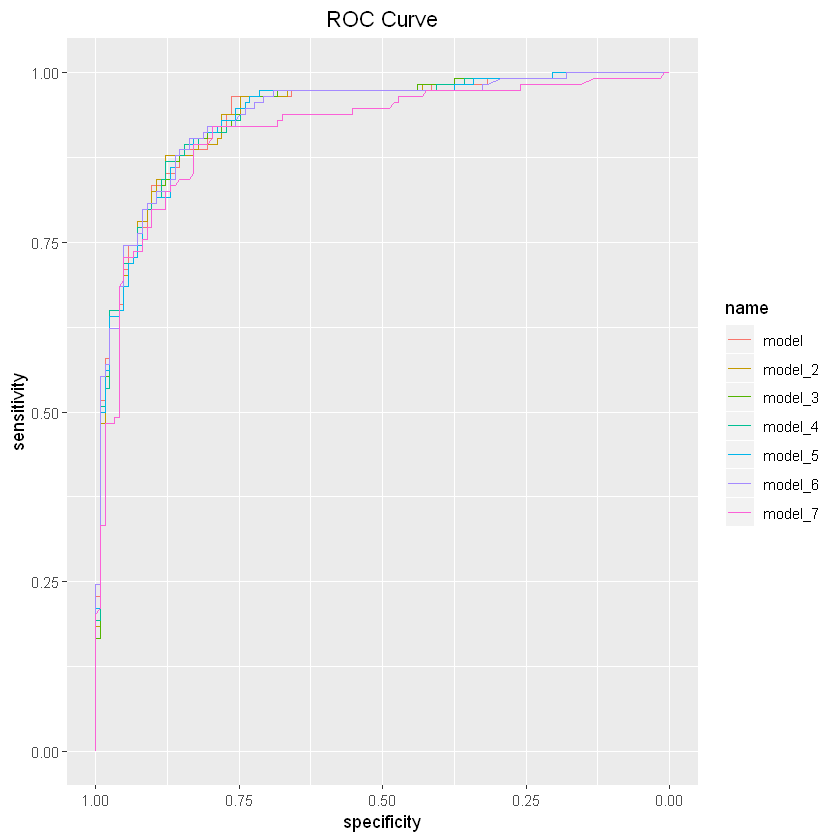

In [18]:
### All ROC plotted on one graph 
### closer to the topleft the better the model
# library(ggplot2) for ggroc()
ggroc(list(model = roccurve, model_2 = roccurve2, model_3 = roccurve3,model_4 = roccurve4, model_5 = roccurve5, model_6 = roccurve6,
           model_7 = roccurve7)) + ggtitle("ROC Curve") + theme(plot.title = element_text(hjust = 0.5))

In [19]:
### tables of models. 
# Looking for models with smallest false negative rate, that means predicited no but Actual is yes 
tables <- list(model1 = tab1,
               model2 = tab2,
               model3 = tab3,
               model4 = tab4,
               model5 = tab5,
               model6 = tab6, 
               model7 = tab7)
tables

$model1
    Actual
Pred <50% diam. >50% diam.
   0        109         19
   1         14         95

$model2
    Actual
Pred <50% diam. >50% diam.
   0        110         19
   1         13         95

$model3
    Actual
Pred <50% diam. >50% diam.
   0        109         20
   1         14         94

$model4
    Actual
Pred <50% diam. >50% diam.
   0        109         20
   1         14         94

$model5
    Actual
Pred <50% diam. >50% diam.
   0        108         21
   1         15         93

$model6
    Actual
Pred <50% diam. >50% diam.
   0        107         19
   1         16         95

$model7
    Actual
Pred <50% diam. >50% diam.
   0        108         21
   1         15         93


In [20]:
### Best Models w/ Test Data Set 
## Model 1
pred_test1 <- predict(model, test, type = 'response')
prediction_1 <- ifelse(pred_test1 > 0.5, 1, 0)
tab_1 <- table(Predicted = prediction_1, Actual = test$AHD)
roccurve_1 <- roc(test$AHD ~ pred_test1)
## Model 4
pred_test4 <- predict(model4, test, type = 'response')
prediction_4 <- ifelse(pred_test4 > 0.5, 1, 0)
tab_4 <- table(Predicted = prediction_4, Actual = test$AHD)
roccurve_4 <- roc(test$AHD ~ pred_test4)
## Model 6
pred_test6 <- predict(model6, test, type = 'response')
prediction_6 <- ifelse(pred_test6 > 0.5, 1, 0)
tab_6 <- table(Predicted = prediction_6, Actual = test$AHD)
roccurve_6 <- roc(test$AHD ~ pred_test6)

Models,Accuracy,AUC
Model1,93.33333,0.9341951
Model4,90,0.9259694
Model6,90,0.9259694


$model1
         Actual
Predicted <50% diam. >50% diam.
        0         36          3
        1          1         20

$model4
         Actual
Predicted <50% diam. >50% diam.
        0         34          3
        1          3         20

$model6
         Actual
Predicted <50% diam. >50% diam.
        0         35          4
        1          2         19


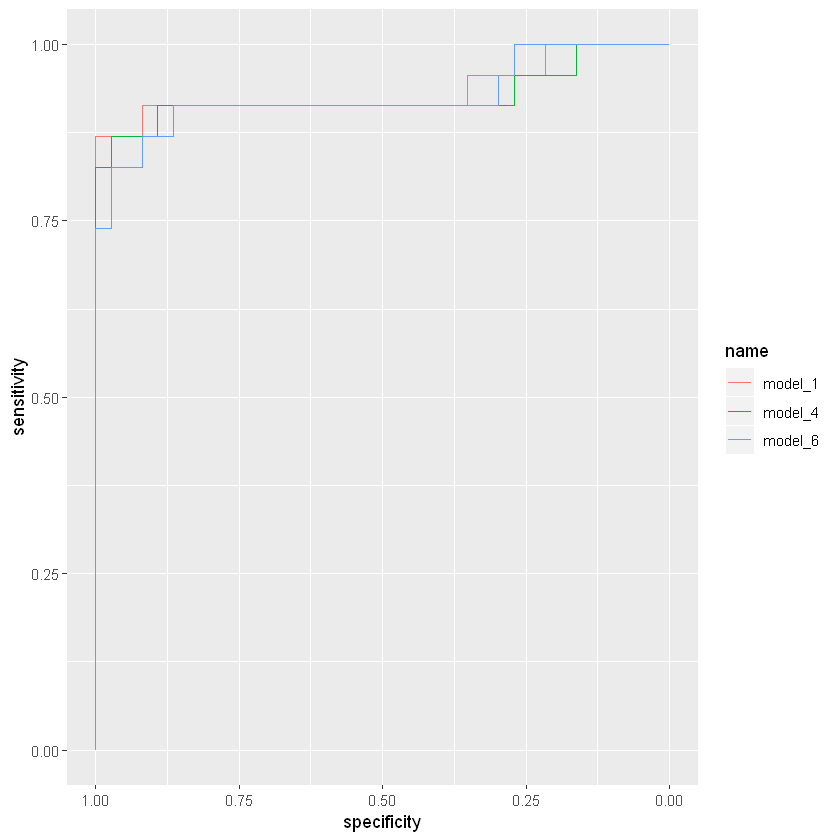

In [21]:
### ROC curve for Best Models 
ggroc(list(model_1 = roccurve_1, model_4 = roccurve_4, model_6 =  roccurve_6))
### AUC for best models 
test_info_list <- list(Model1 = list(Accuracy = acc(tab_1), AUC = auc(roccurve_1)),
                       Model4 = list(Accuracy = acc(tab_4), AUC = auc(roccurve_4)),
                       Model6 = list(Accuracy = acc(tab_6), AUC = auc(roccurve_6)))
test_info1 <- do.call(rbind, test_info_list)
test_info2 <- as.data.frame(test_info1)
test_info <- rownames_to_column(test_info2, "Models")
test_info
tables_test <- list(model1 = tab_1,
                    model4 = tab_4,
                    model6 = tab_6)
tables_test


Call:
svm(formula = AHD ~ ., data = train, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.04761905 

Number of Support Vectors:  100

 ( 52 48 )


Number of Classes:  2 

Levels: 
 <50% diam. >50% diam.




            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.        107         19
  >50% diam.         16         95


Call:
svm(formula = AHD ~ ., data = train, kernel = "sigmoid")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  sigmoid 
       cost:  1 
      gamma:  0.04761905 
     coef.0:  0 

Number of Support Vectors:  133

 ( 66 67 )


Number of Classes:  2 

Levels: 
 <50% diam. >50% diam.




            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.         98         22
  >50% diam.         25         92

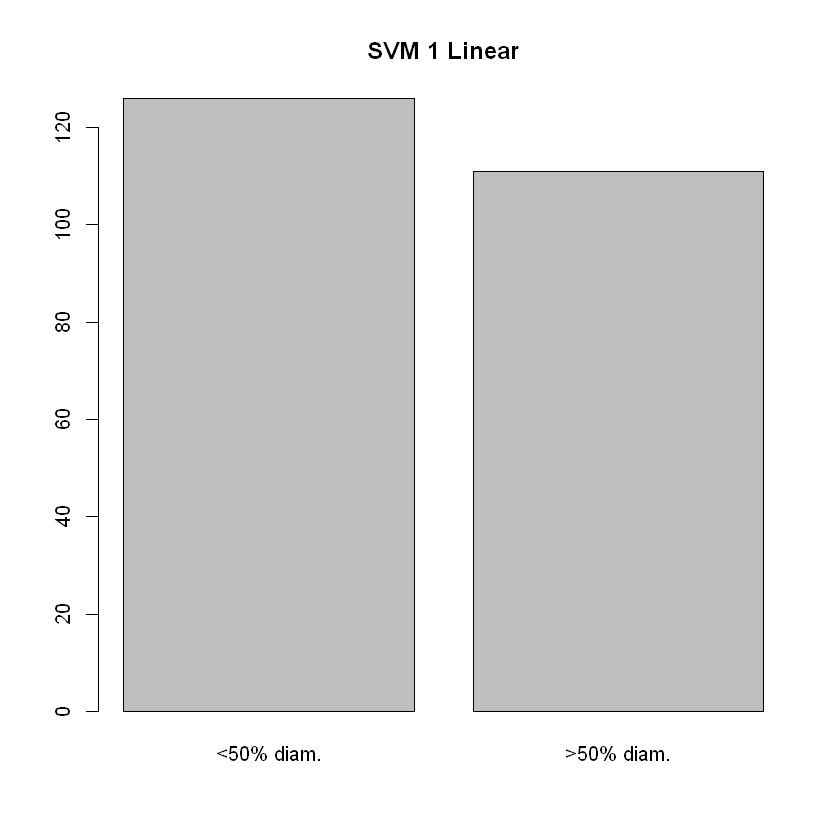


Call:
svm(formula = AHD ~ ., data = train, kernel = "polynomial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  3 
      gamma:  0.04761905 
     coef.0:  0 

Number of Support Vectors:  212

 ( 105 107 )


Number of Classes:  2 

Levels: 
 <50% diam. >50% diam.




            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.        120         58
  >50% diam.          3         56

[1] 74.2616

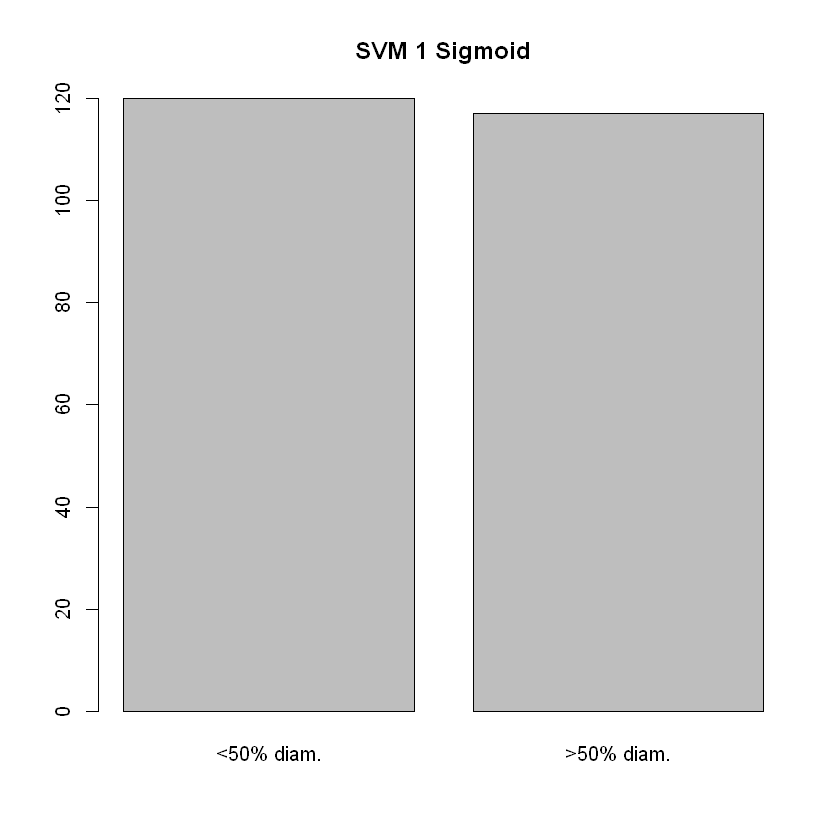


Call:
svm(formula = AHD ~ Sex + ChestPain + RestBP + MaxHR + Oldpeak + 
    Slope + Ca, data = train, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.07692308 

Number of Support Vectors:  103

 ( 52 51 )


Number of Classes:  2 

Levels: 
 <50% diam. >50% diam.




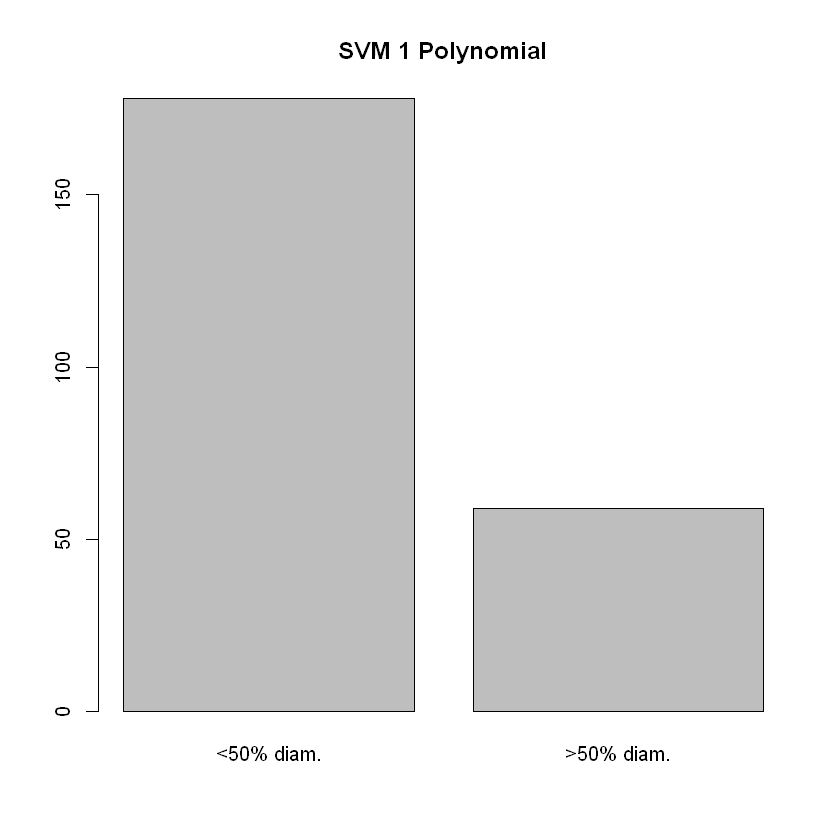

            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.        104         19
  >50% diam.         19         95


Call:
svm(formula = AHD ~ Sex + ChestPain + RestBP + MaxHR + Oldpeak + 
    Slope + Ca, data = train, kernel = "sigmoid")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  sigmoid 
       cost:  1 
      gamma:  0.07692308 
     coef.0:  0 

Number of Support Vectors:  140

 ( 70 70 )


Number of Classes:  2 

Levels: 
 <50% diam. >50% diam.




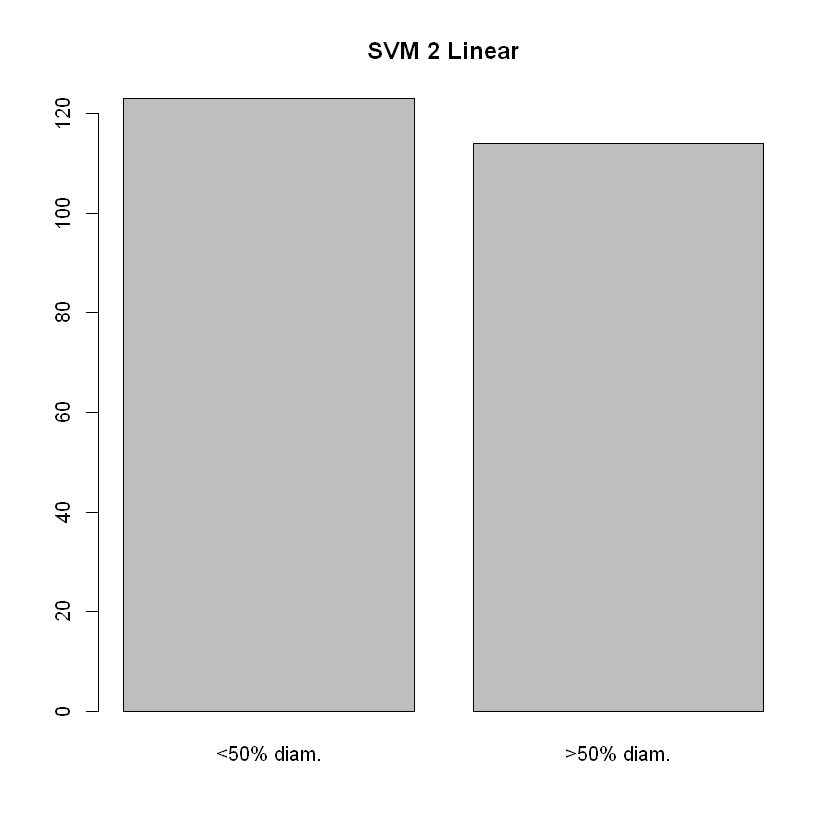

            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.        101         24
  >50% diam.         22         90


Call:
svm(formula = AHD ~ Age + Sex + ChestPain + RestBP + MaxHR + Oldpeak + 
    Slope + Ca + Thal, data = train, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.0625 

Number of Support Vectors:  99

 ( 49 50 )


Number of Classes:  2 

Levels: 
 <50% diam. >50% diam.




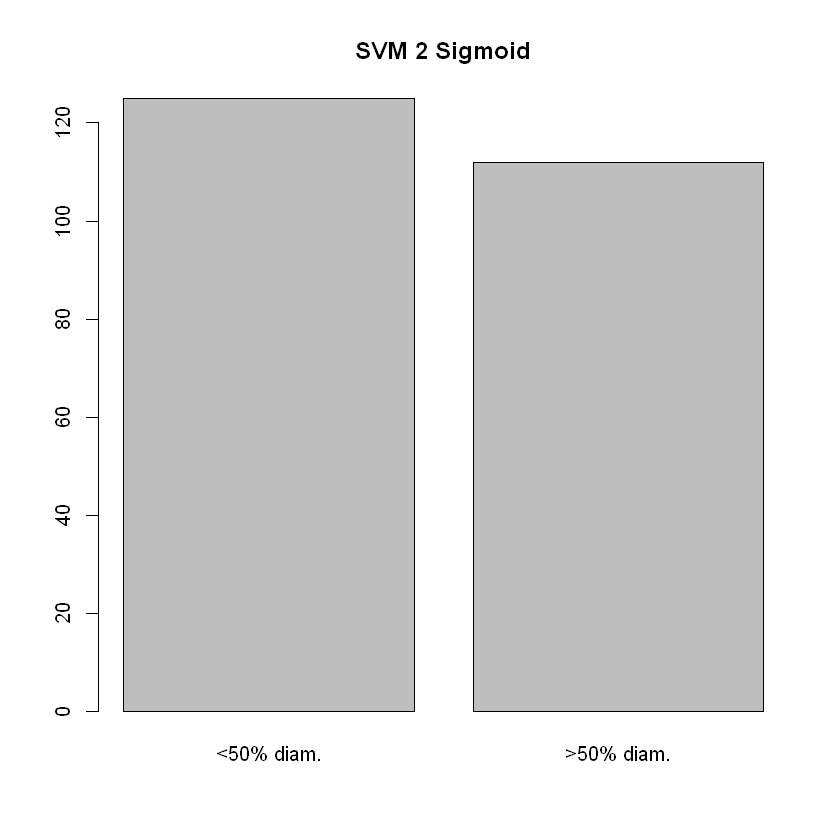

            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.        108         22
  >50% diam.         15         92


Call:
svm(formula = AHD ~ Age + Sex + ChestPain + RestBP + MaxHR + Oldpeak + 
    Slope + Ca + Thal, data = train, kernel = "sigmoid")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  sigmoid 
       cost:  1 
      gamma:  0.0625 
     coef.0:  0 

Number of Support Vectors:  132

 ( 67 65 )


Number of Classes:  2 

Levels: 
 <50% diam. >50% diam.




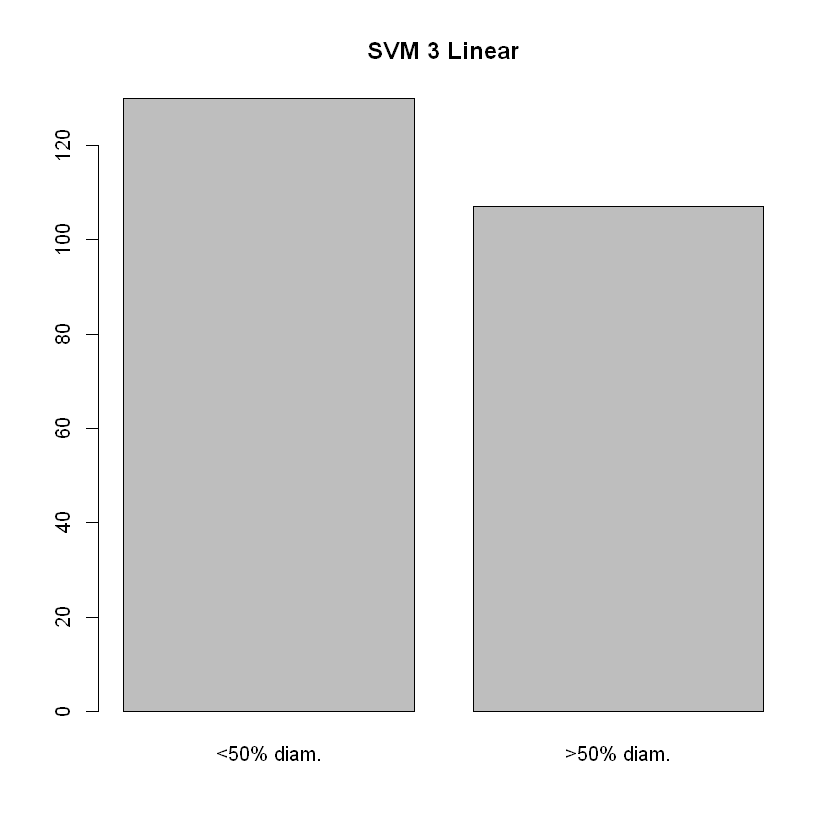

            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.         99         19
  >50% diam.         24         95


Call:
svm(formula = AHD ~ Age + Sex + ChestPain + RestBP + MaxHR + Oldpeak + 
    Slope + Ca + Thal + Chol, data = train, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.05882353 

Number of Support Vectors:  98

 ( 50 48 )


Number of Classes:  2 

Levels: 
 <50% diam. >50% diam.




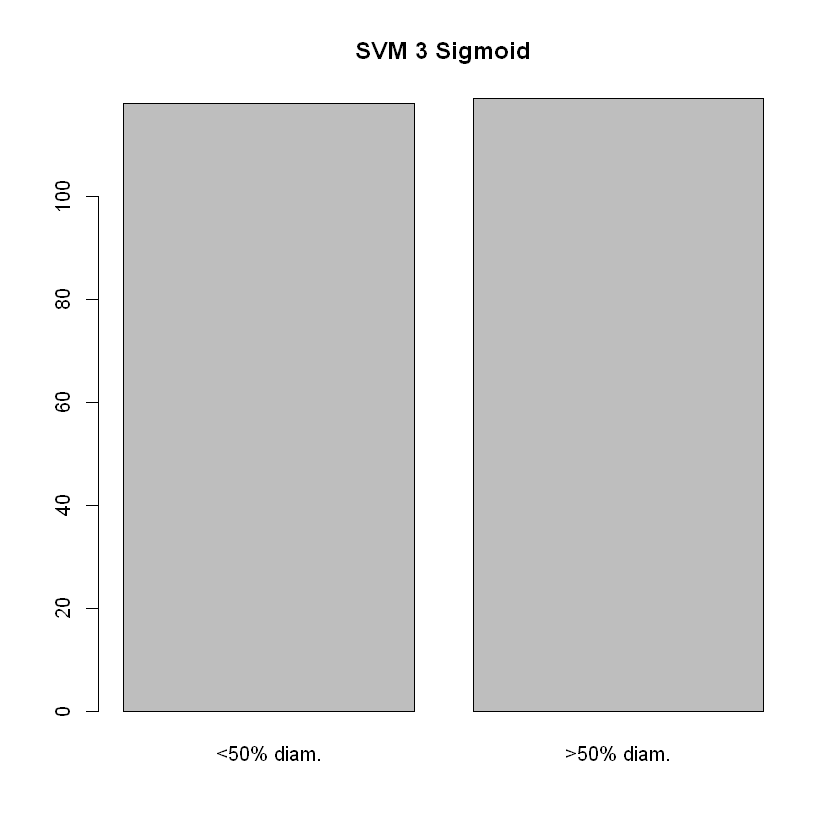

            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.        106         18
  >50% diam.         17         96


Call:
svm(formula = AHD ~ Age + Sex + ChestPain + RestBP + MaxHR + Oldpeak + 
    Slope + Ca + Thal + Chol, data = train, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.05882353 

Number of Support Vectors:  98

 ( 50 48 )


Number of Classes:  2 

Levels: 
 <50% diam. >50% diam.




            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.        118         42
  >50% diam.          5         72

[1] 80.16878


Call:
svm(formula = AHD ~ Age + Sex + ChestPain + RestBP + MaxHR + Oldpeak + 
    Slope + Ca + Thal + Chol, data = train, kernel = "sigmoid")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  sigmoid 
       cost:  1 
      gamma:  0.05882353 
     coef.0:  0 

Number of Support Vectors:  133

 ( 66 67 )


Number of Classes:  2 

Levels: 
 <50% diam. >50% diam.




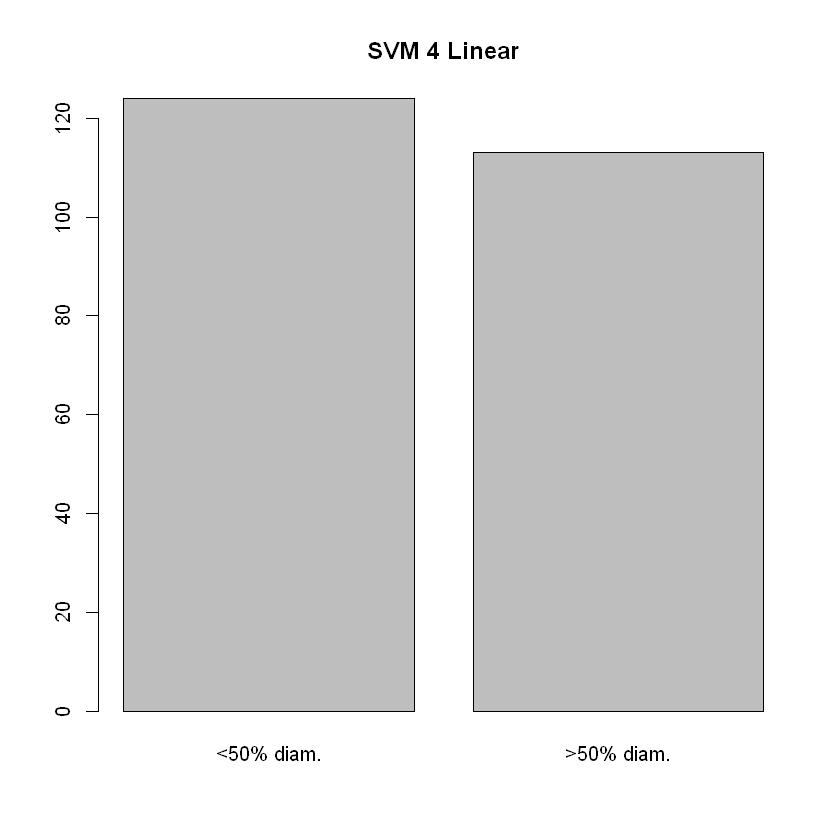

            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.         99         19
  >50% diam.         24         95


Call:
svm(formula = AHD ~ Age + Sex + ChestPain + RestBP + MaxHR + Oldpeak + 
    Slope + Ca + Thal + ExAng, data = train, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.05882353 

Number of Support Vectors:  97

 ( 49 48 )


Number of Classes:  2 

Levels: 
 <50% diam. >50% diam.




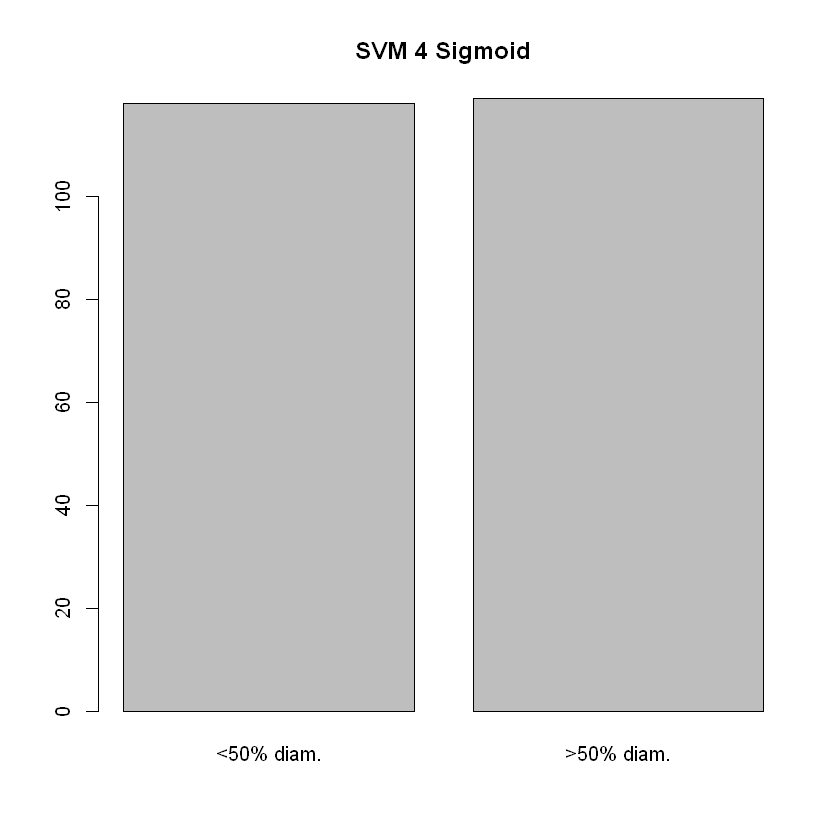

            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.        108         21
  >50% diam.         15         93


Call:
svm(formula = AHD ~ Age + Sex + ChestPain + RestBP + MaxHR + Oldpeak + 
    Slope + Ca + Thal + ExAng, data = train, kernel = "sigmoid")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  sigmoid 
       cost:  1 
      gamma:  0.05882353 
     coef.0:  0 

Number of Support Vectors:  130

 ( 65 65 )


Number of Classes:  2 

Levels: 
 <50% diam. >50% diam.




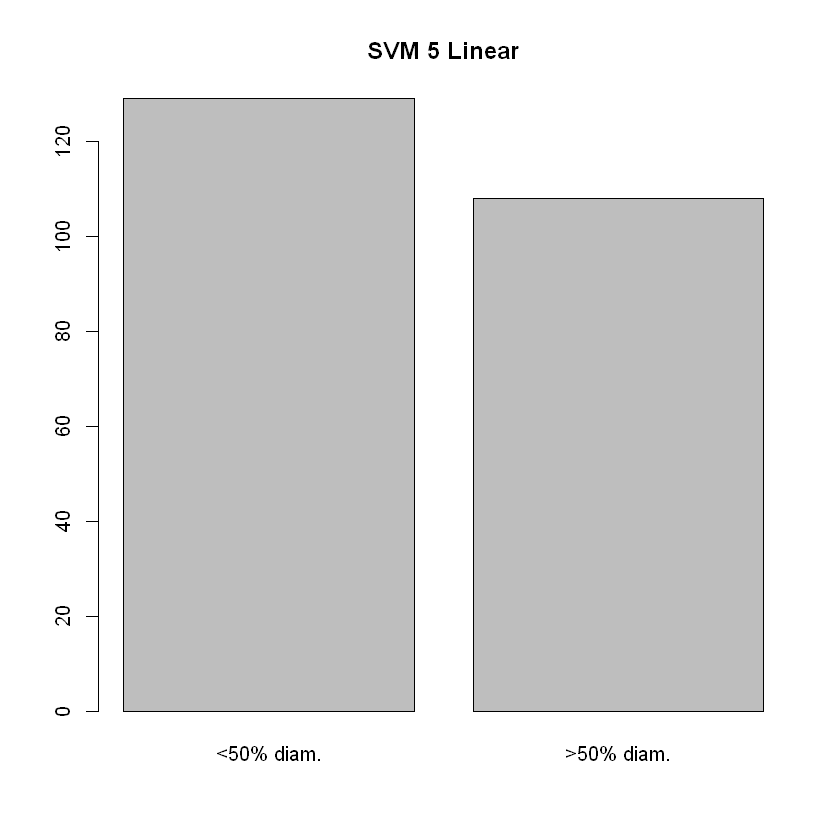

            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.         99         21
  >50% diam.         24         93


Call:
svm(formula = AHD ~ Sex + ChestPain + RestBP + MaxHR + Oldpeak + 
    Slope + Ca + Thal + ExAng + Chol, data = train, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.05882353 

Number of Support Vectors:  99

 ( 48 51 )


Number of Classes:  2 

Levels: 
 <50% diam. >50% diam.




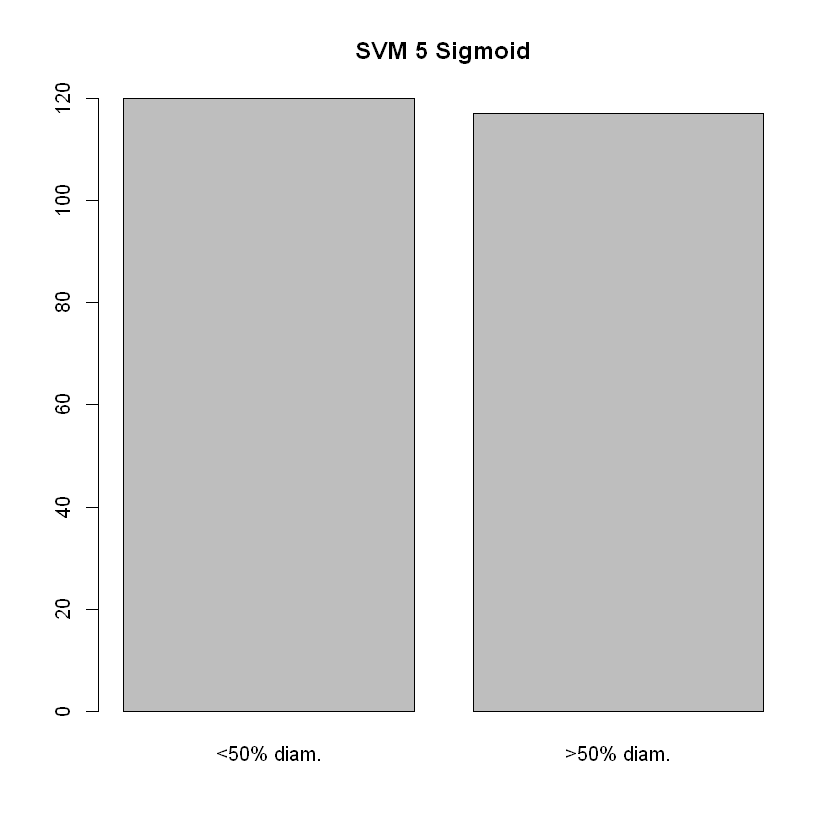

            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.        109         21
  >50% diam.         14         93


Call:
svm(formula = AHD ~ Sex + ChestPain + RestBP + MaxHR + Oldpeak + 
    Slope + Ca + Thal + ExAng + Chol, data = train, kernel = "sigmoid")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  sigmoid 
       cost:  1 
      gamma:  0.05882353 
     coef.0:  0 

Number of Support Vectors:  130

 ( 65 65 )


Number of Classes:  2 

Levels: 
 <50% diam. >50% diam.




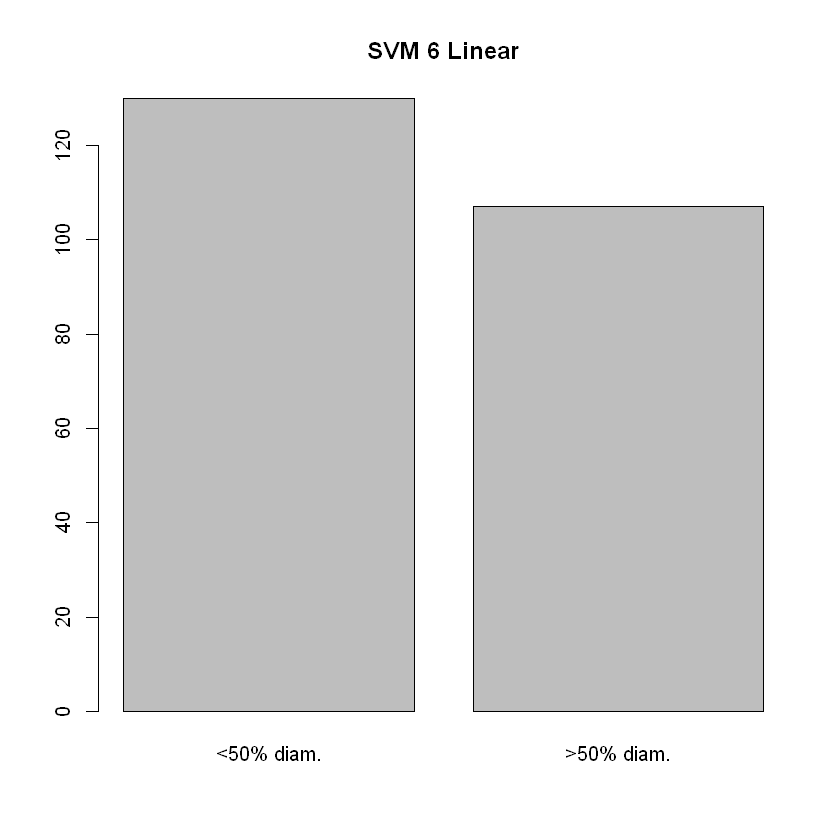

            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.         97         21
  >50% diam.         26         93


Call:
svm(formula = AHD ~ Age + Sex + ChestPain + RestBP + MaxHR + Oldpeak + 
    Slope + Ca + Thal + RestECG, data = train, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.05555556 

Number of Support Vectors:  99

 ( 49 50 )


Number of Classes:  2 

Levels: 
 <50% diam. >50% diam.




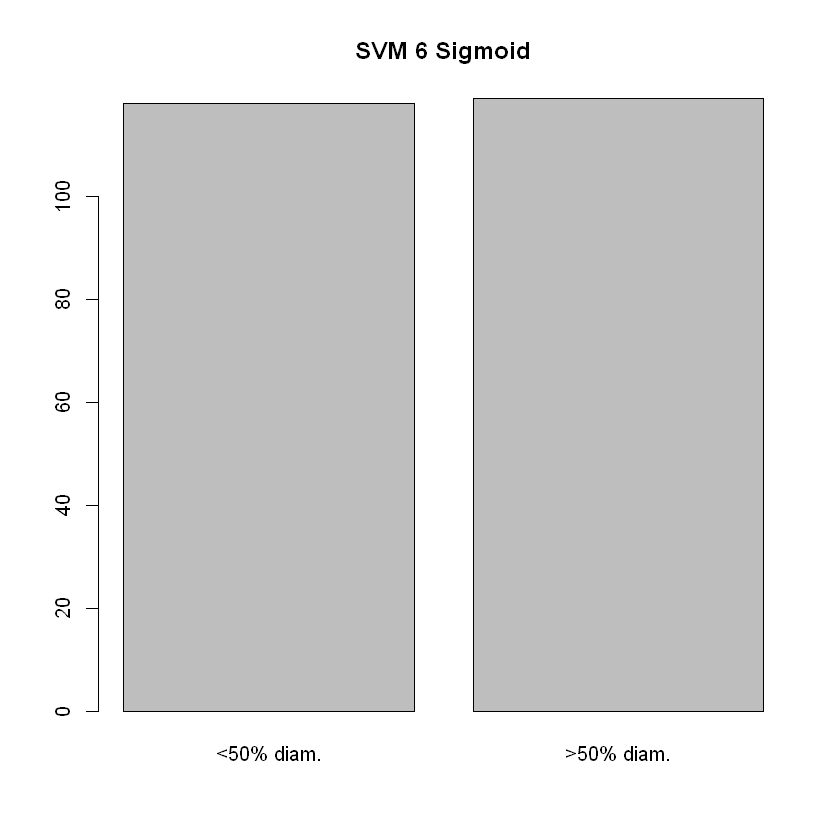

            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.        108         19
  >50% diam.         15         95


Call:
svm(formula = AHD ~ Age + Sex + ChestPain + RestBP + MaxHR + Oldpeak + 
    Slope + Ca + Thal + RestECG, data = train, kernel = "sigmoid")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  sigmoid 
       cost:  1 
      gamma:  0.05555556 
     coef.0:  0 

Number of Support Vectors:  137

 ( 69 68 )


Number of Classes:  2 

Levels: 
 <50% diam. >50% diam.




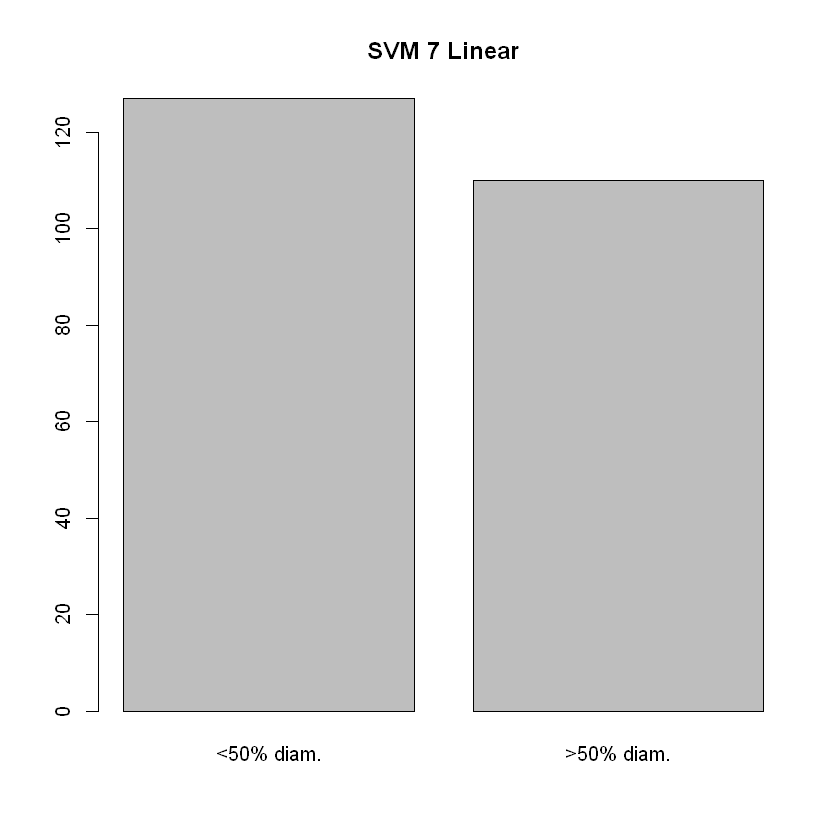

            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.         99         19
  >50% diam.         24         95


Call:
svm(formula = AHD ~ Age + Sex + ChestPain + RestBP + MaxHR + Oldpeak + 
    Slope + Ca + Thal + Fbs, data = train, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.05882353 

Number of Support Vectors:  98

 ( 49 49 )


Number of Classes:  2 

Levels: 
 <50% diam. >50% diam.




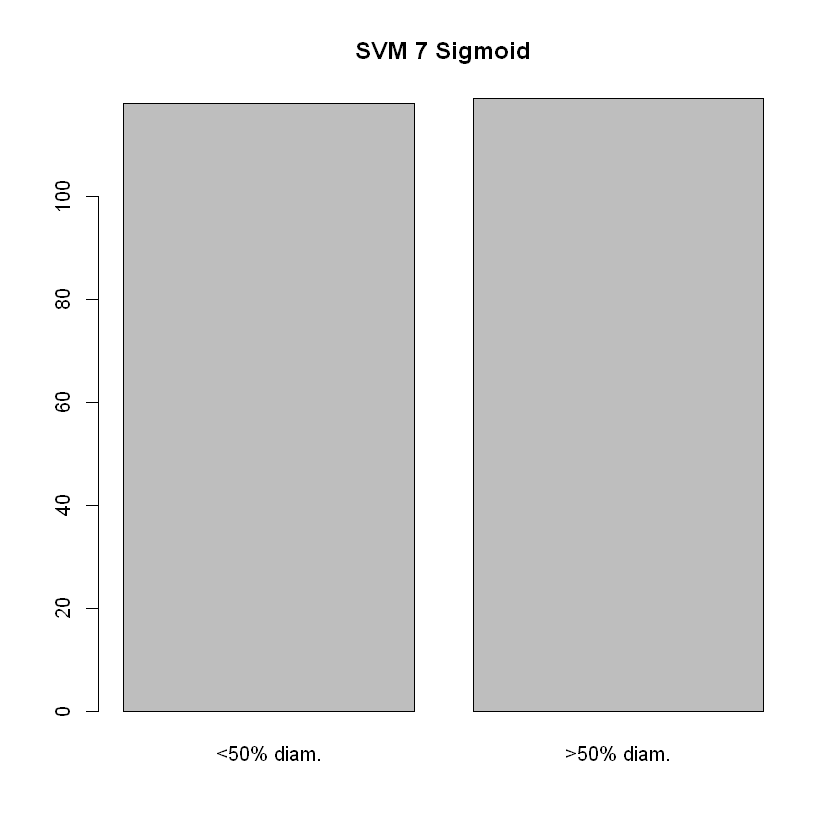

            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.        108         22
  >50% diam.         15         92


Call:
svm(formula = AHD ~ Age + Sex + ChestPain + RestBP + MaxHR + Oldpeak + 
    Slope + Ca + Thal + Fbs, data = train, kernel = "sigmoid")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  sigmoid 
       cost:  1 
      gamma:  0.05882353 
     coef.0:  0 

Number of Support Vectors:  134

 ( 66 68 )


Number of Classes:  2 

Levels: 
 <50% diam. >50% diam.




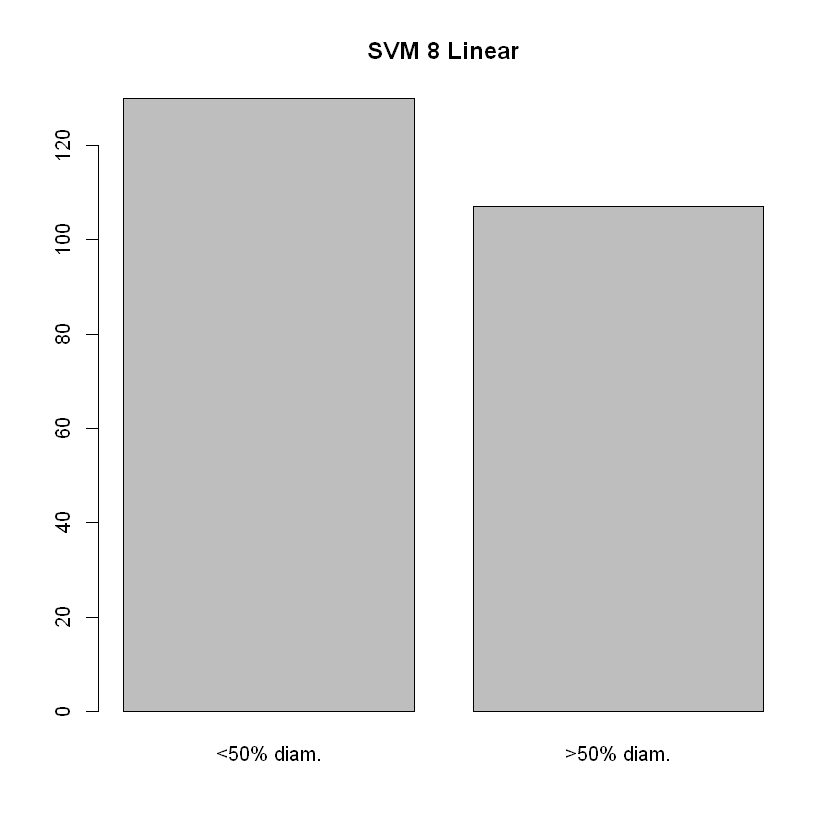

            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.        100         19
  >50% diam.         23         95


Call:
svm(formula = AHD ~ Sex + ChestPain + RestBP + MaxHR + Oldpeak + 
    Slope + Ca + Thal + Fbs + RestECG + Chol + ExAng, data = train, 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.05 

Number of Support Vectors:  98

 ( 49 49 )


Number of Classes:  2 

Levels: 
 <50% diam. >50% diam.




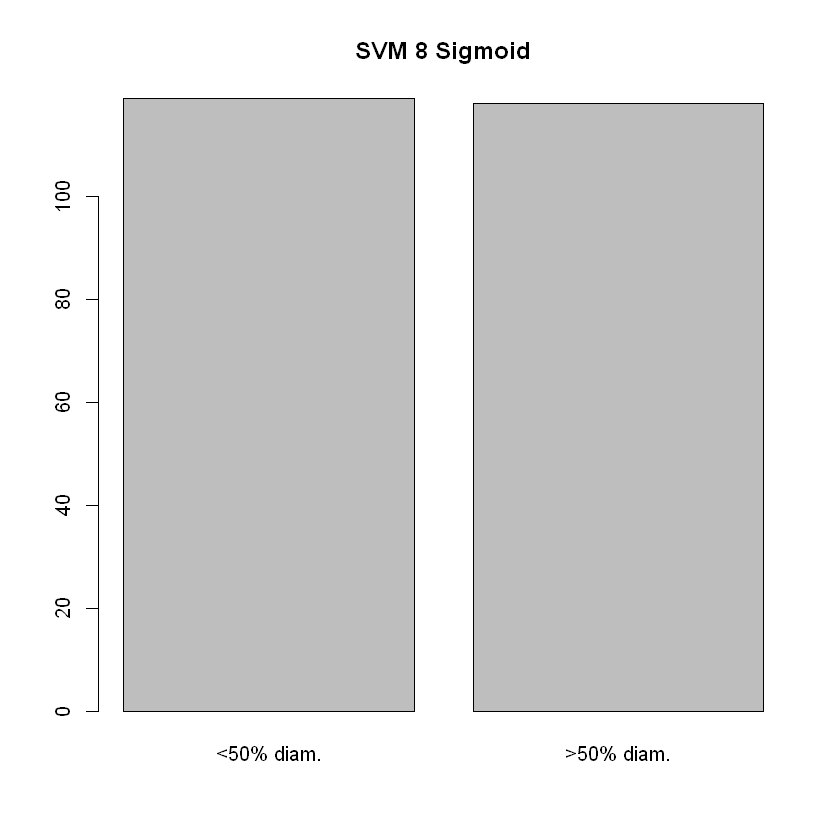

            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.        108         19
  >50% diam.         15         95


Call:
svm(formula = AHD ~ Sex + ChestPain + RestBP + MaxHR + Oldpeak + 
    Slope + Ca + Thal + Fbs + RestECG + Chol + ExAng, data = train, 
    kernel = "sigmoid")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  sigmoid 
       cost:  1 
      gamma:  0.05 
     coef.0:  0 

Number of Support Vectors:  133

 ( 67 66 )


Number of Classes:  2 

Levels: 
 <50% diam. >50% diam.




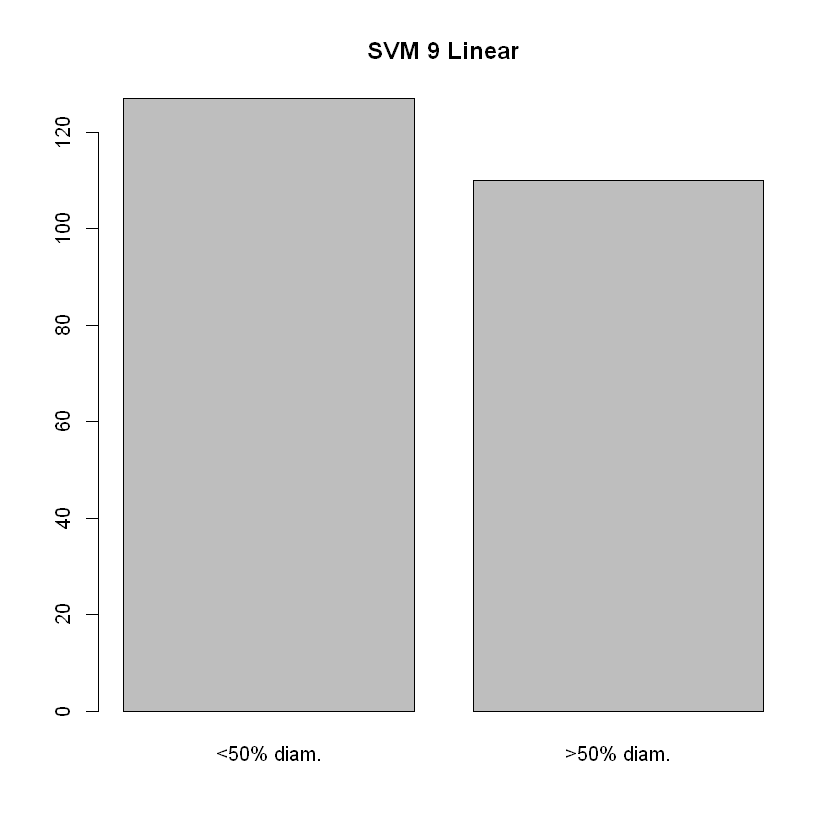

            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.         98         20
  >50% diam.         25         94

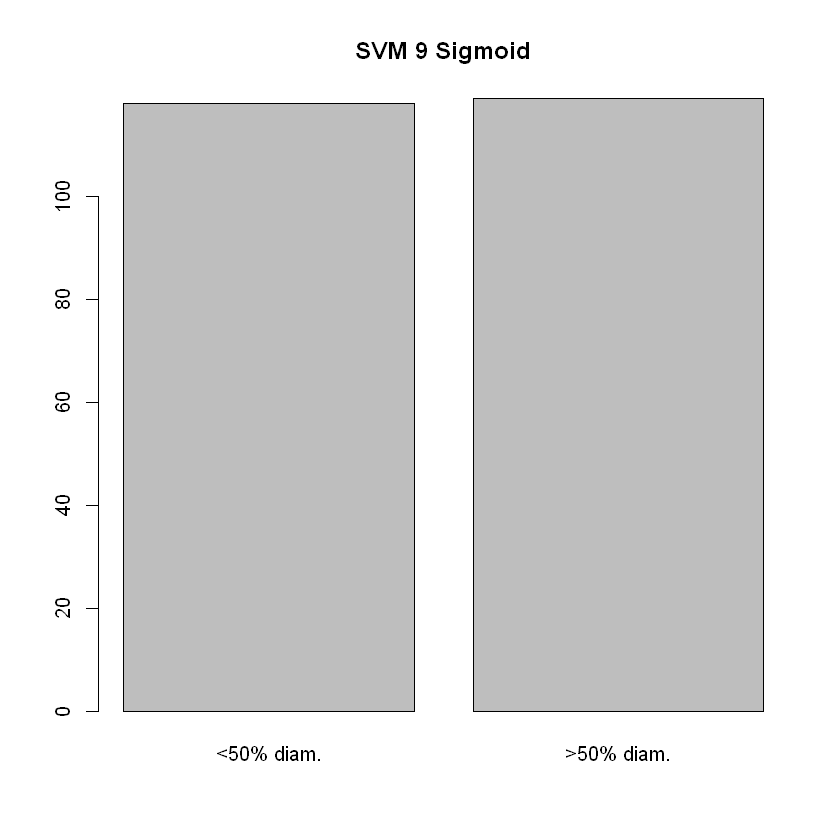

In [22]:
### Support Vector Machines
#install.packages('e1071')
library(e1071)
svm1_lin <-  svm(AHD ~ ., data = train, kernel = "linear")
summary(svm1_lin)
pred1_lin <- predict(svm1_lin, train, type = "class")
tab_lin <- table(Predicited = pred1_lin, Actual = train$AHD)
tab_lin
plot(pred1_lin, main = "SVM 1 Linear")
######### Sigmoid #########
svm1_sig <-  svm(AHD ~ ., data = train, kernel = "sigmoid")
summary(svm1_sig)
pred1_sig <- predict(svm1_sig, train, type = "class")
tab_sig <- table(Predicited = pred1_sig, Actual = train$AHD)
tab_sig
plot(pred1_sig, main = "SVM 1 Sigmoid")
######### Polynomial #########
svm1_poly <-  svm(AHD ~ ., data = train, kernel = "polynomial")
summary(svm1_poly)
pred1_poly <- predict(svm1_poly, train, type = "class")
tab_poly <- table(Predicited = pred1_poly, Actual = train$AHD)
tab_poly
acc(tab_poly)
plot(pred1_poly, main = "SVM 1 Polynomial")
########## Svm 2 ############
svm2 <- svm(AHD ~ Sex + ChestPain +  RestBP + MaxHR + Oldpeak + Slope + Ca, data = train, kernel = "linear")
summary(svm2)
pred2 <- predict(svm2, train, type = "class")
plot(pred2, main = "SVM 2 Linear")
tab2 <- table(Predicited = pred2, Actual = train$AHD)
tab2
######### Sigmoid ##########
svm2_sig <- svm(AHD ~ Sex + ChestPain +  RestBP + MaxHR + Oldpeak + Slope + Ca, data = train, kernel = "sigmoid")
summary(svm2_sig)
pred2_sig <- predict(svm2_sig, train, type = "class")
plot(pred2_sig, main = "SVM 2 Sigmoid")
tab2_sig <- table(Predicited = pred2_sig, Actual = train$AHD)
tab2_sig
########## Svm 3 ############
svm3 <- svm(AHD ~ Age + Sex + ChestPain +  RestBP + MaxHR + Oldpeak + Slope + Ca + Thal, data = train, kernel = "linear")
summary(svm3)
pred3 <- predict(svm3, train, type = "class")
plot(pred3, main = "SVM 3 Linear")
tab3 <- table(Predicited = pred3, Actual = train$AHD)
tab3
######### Sigmoid ##########
svm3_sig <- svm(AHD ~  Age + Sex + ChestPain +  RestBP + MaxHR + Oldpeak + Slope + Ca + Thal, data = train, kernel = "sigmoid")
summary(svm3_sig)
pred3_sig <- predict(svm3_sig, train, type = "class")
plot(pred3_sig, main = "SVM 3 Sigmoid")
tab3_sig <- table(Predicited = pred3_sig, Actual = train$AHD)
tab3_sig
########## SVM 4 ###########
svm4 <- svm(AHD ~ Age + Sex + ChestPain +  RestBP + MaxHR + Oldpeak + Slope + Ca + Thal + Chol, data = train, kernel = "linear")
summary(svm4)
pred4 <- predict(svm4, train, type = "class")
plot(pred4, main = "SVM 4 Linear")
tab4 <- table(Predicited = pred4, Actual = train$AHD)
tab4
######### poly #############
psvm4 <- svm(AHD ~ Age + Sex + ChestPain +  RestBP + MaxHR + Oldpeak + Slope + Ca + Thal + Chol, data = train, kernel = "polynomial")
summary(svm4)
ppred4 <- predict(psvm4, train, type = "class")
plot(pred4, main = "SVM 4 Linear")
ptab4 <- table(Predicited = ppred4, Actual = train$AHD)
ptab4
acc4 = acc(ptab4)
acc4
######### Sigmoid ##########
svm4_sig <- svm(AHD ~ Age + Sex + ChestPain +  RestBP + MaxHR + Oldpeak + Slope + Ca + Thal + Chol, data = train, kernel = "sigmoid")
summary(svm4_sig)
pred4_sig <- predict(svm4_sig, train, type = "class")
plot(pred4_sig, main = "SVM 4 Sigmoid")
tab4_sig <- table(Predicited = pred4_sig, Actual = train$AHD)
tab4_sig
########## SVM 5 ############
svm5 <- svm(AHD ~ Age + Sex + ChestPain +  RestBP + MaxHR + Oldpeak + Slope + Ca + Thal + ExAng, data = train, kernel = "linear")
summary(svm5)
pred5 <- predict(svm5, train, type = "class")
plot(pred5, main = "SVM 5 Linear")
tab5 <- table(Predicited = pred5, Actual = train$AHD)
tab5
######### Sigmoid ##########
svm5_sig <- svm(AHD ~ Age + Sex + ChestPain +  RestBP + MaxHR + Oldpeak + Slope + Ca + Thal + ExAng, data = train, kernel = "sigmoid")
summary(svm5_sig)
pred5_sig <- predict(svm5_sig, train, type = "class")
plot(pred5_sig, main = "SVM 5 Sigmoid")
tab5_sig <- table(Predicited = pred5_sig, Actual = train$AHD)
tab5_sig
########## SVM 6 ##################
svm6 <- svm(AHD ~ Sex + ChestPain +  RestBP + MaxHR + Oldpeak + Slope + Ca + Thal + ExAng + Chol, data = train, kernel = "linear")
summary(svm6)
pred6 <- predict(svm6, train, type = "class")
plot(pred6, main = "SVM 6 Linear")
tab6 <- table(Predicited = pred6, Actual = train$AHD)
tab6
######### Sigmoid ##########
svm6_sig <- svm(AHD ~ Sex + ChestPain +  RestBP + MaxHR + Oldpeak + Slope + Ca + Thal + ExAng + Chol, data = train, kernel = "sigmoid")
summary(svm6_sig)
pred6_sig <- predict(svm6_sig, train, type = "class")
plot(pred6_sig, main = "SVM 6 Sigmoid")
tab6_sig <- table(Predicited = pred6_sig, Actual = train$AHD)
tab6_sig
########### SVM 7 ##############
svm7 <- svm(AHD ~ Age + Sex + ChestPain +  RestBP + MaxHR + Oldpeak + Slope + Ca + Thal +  RestECG, data = train, kernel = "linear")
summary(svm7)
pred7 <- predict(svm7, train, type = "class")
plot(pred7, main = "SVM 7 Linear")
tab7 <- table(Predicited = pred7, Actual = train$AHD)
tab7
######### Sigmoid ##########
svm7_sig <- svm(AHD ~ Age + Sex + ChestPain +  RestBP + MaxHR + Oldpeak + Slope + Ca + Thal +  RestECG, data = train, kernel = "sigmoid")
summary(svm7_sig)
pred7_sig <- predict(svm7_sig, train, type = "class")
plot(pred7_sig, main = "SVM 7 Sigmoid")
tab7_sig <- table(Predicited = pred7_sig, Actual = train$AHD)
tab7_sig
########### SVM 8 #########
svm8 <- svm(AHD ~ Age + Sex + ChestPain +  RestBP + MaxHR + Oldpeak + Slope + Ca + Thal +  Fbs, data = train, kernel = "linear")
summary(svm8)
pred8 <- predict(svm8, train, type = "class")
plot(pred8,main = "SVM 8 Linear")
tab8 <- table(Predicited = pred8, Actual = train$AHD)
tab8
######### Sigmoid ##########
svm8_sig <- svm(AHD ~ Age + Sex + ChestPain +  RestBP + MaxHR + Oldpeak + Slope + Ca + Thal +  Fbs, data = train, kernel = "sigmoid")
summary(svm8_sig)
pred8_sig <- predict(svm8_sig, train, type = "class")
plot(pred8_sig,main = "SVM 8 Sigmoid")
tab8_sig <- table(Predicited = pred8_sig, Actual = train$AHD)
tab8_sig
########### SVM 9 #########
svm9 <- svm(AHD ~ Sex + ChestPain +  RestBP + MaxHR + Oldpeak + Slope + Ca + Thal +  Fbs + RestECG + Chol + ExAng, data = train, kernel = "linear")
summary(svm9)
pred9 <- predict(svm9, train, type = "class")
plot(pred9, main = "SVM 9 Linear")
tab9 <- table(Predicited = pred9, Actual = train$AHD)
tab9
######### Sigmoid ##########
svm9_sig <- svm(AHD ~ Sex + ChestPain +  RestBP + MaxHR + Oldpeak + Slope + Ca + Thal +  Fbs + RestECG + Chol + ExAng, data = train, kernel = "sigmoid")
summary(svm9_sig)
pred9_sig <- predict(svm9_sig, train, type = "class")
plot(pred9_sig, main = "SVM 9 Sigmoid")
tab9_sig <- table(Predicited = pred9_sig, Actual = train$AHD)
tab9_sig

In [23]:
### Number of support vectors, table for each model, Accuracy for each model
##For train 
svm_list <- list(svm1 = list(svm1_lin$tot.nSV,acc(tab_lin)),
                 svm1_sig = list(svm1_sig$tot.nSV,acc(tab_sig)),
                 svm2 = list(svm2$tot.nSV,acc(tab2)),
                 svm2_sig = list(svm2_sig$tot.nSV,acc(tab2_sig)),
                 svm3 = list(svm3$tot.nSV,acc(tab3)),
                 svm3_sig = list(svm3_sig$tot.nSV,acc(tab3_sig)),
                 svm4 = list(svm4$tot.nSV ,acc(tab4)),
                 svm4_sig = list(svm4_sig$tot.nSV ,acc(tab4_sig)),
                 svm5 = list(svm5$tot.nSV ,acc(tab5)),
                 svm5_sig = list(svm5_sig$tot.nSV ,acc(tab5_sig)),
                 svm6 = list(svm6$tot.nSV ,acc(tab6)),
                 svm6_sig = list(svm6_sig$tot.nSV ,acc(tab6_sig)),
                 svm7 = list(svm7$tot.nSV ,acc(tab7)),
                 svm7_sig = list(svm7_sig$tot.nSV ,acc(tab7_sig)),
                 svm8 = list(svm8$tot.nSV ,acc(tab8)),
                 svm8_sig = list(svm8_sig$tot.nSV ,acc(tab8_sig)),
                 svm9 = list(svm9$tot.nSV ,acc(tab9)),
                 svm9_sig = list(svm9_sig$tot.nSV ,acc(tab9_sig)))
svm_info1 <- do.call(rbind, svm_list)
svm_info2  <- as.data.frame(svm_info1 )
svm_info <- rownames_to_column(svm_info2, "Models")
names(svm_info)[2] <- "Total Support Vectors"
names(svm_info)[3] <- "Accuracy"
svm_info$Accuracy <- round(as.numeric(svm_info$Accuracy), 2)
svm_info

Models,Total Support Vectors,Accuracy
svm1,100,85.23
svm1_sig,133,80.17
svm2,103,83.97
svm2_sig,140,80.59
svm3,99,84.39
svm3_sig,132,81.86
svm4,98,85.23
svm4_sig,133,81.86
svm5,97,84.81
svm5_sig,130,81.01


In [24]:
###Tables
svm_tables <- list(svm1 = tab_lin,
                   svm2 = tab2,
                   svm3 = tab3,
                   svm4 = tab4,
                   svm5 = tab5,
                   svm6 = tab6,
                   svm7 = tab7,
                   svm8 = tab8,
                   svm9 = tab9)
svm_tables

$svm1
            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.        107         19
  >50% diam.         16         95

$svm2
            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.        104         19
  >50% diam.         19         95

$svm3
            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.        108         22
  >50% diam.         15         92

$svm4
            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.        106         18
  >50% diam.         17         96

$svm5
            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.        108         21
  >50% diam.         15         93

$svm6
            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.        109         21
  >50% diam.         14         93

$svm7
            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.        108         19
  >50% diam.         15         95

$svm8
            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.        108

            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.         36          3
  >50% diam.          1         20

[1] 93.33333

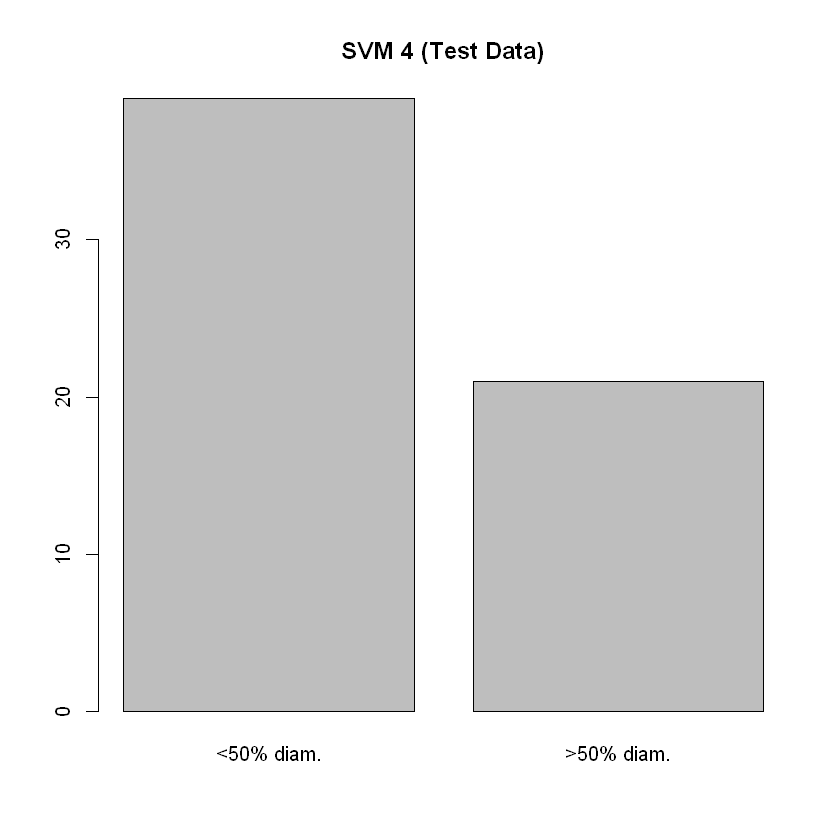

            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.         36          4
  >50% diam.          1         19

[1] 91.66667

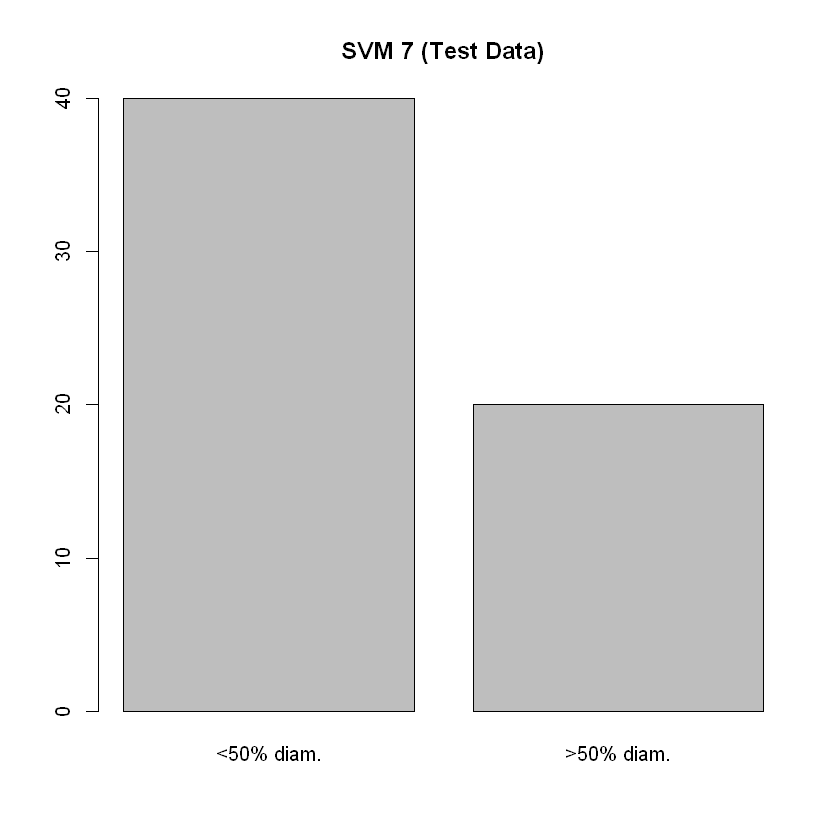

            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.         35          3
  >50% diam.          2         20

[1] 91.66667

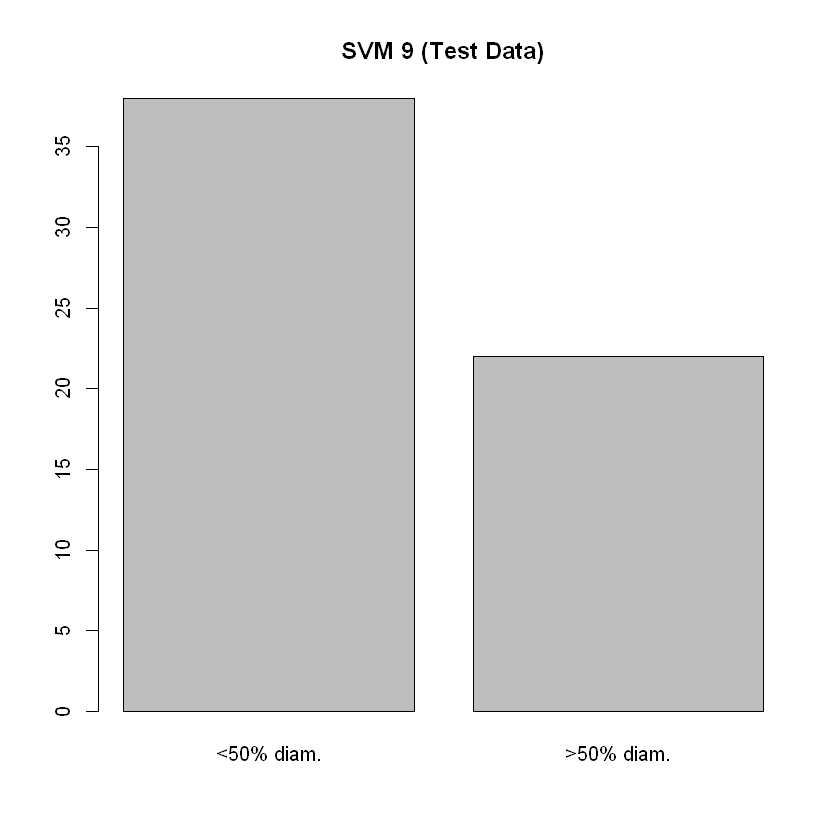

In [25]:
### Best Models 
### svm 4
pred_4 <- predict(svm4, test, type = "class")
plot(pred_4,main = "SVM 4 (Test Data)")
tab_4 <- table(Predicited = pred_4, Actual = test$AHD)
tab_4
acc(tab_4)
### svm 7
pred_7 <- predict(svm7, test, type = "class")
plot(pred_7, main = "SVM 7 (Test Data)")
tab_7 <- table(Predicited = pred_7, Actual = test$AHD)
tab_7
acc(tab_7)
### svm 9 
pred_9 <- predict(svm9, test, type = "class")
plot(pred_9, main = "SVM 9 (Test Data)")
tab_9 <- table(Predicited = pred_9, Actual = test$AHD)
tab_9
acc(tab_9)

In [26]:
### Number of support vectors, table for each model, Accuracy for each model
### For test
list(svm4 = list(Total_Support_Vectors = svm4$tot.nSV, Table = tab_4 ,Accuracy = acc(tab_4)),
     svm7 = list(Total_Support_Vectors = svm7$tot.nSV,Table = tab_7 ,Accuracy = acc(tab_7)),
     svm9 = list(Total_Support_Vectors = svm9$tot.nSV,Table = tab_9 ,Accuracy = acc(tab_9)))

$svm4
$svm4$Total_Support_Vectors
[1] 98

$svm4$Table
            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.         36          3
  >50% diam.          1         20

$svm4$Accuracy
[1] 93.33333


$svm7
$svm7$Total_Support_Vectors
[1] 99

$svm7$Table
            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.         36          4
  >50% diam.          1         19

$svm7$Accuracy
[1] 91.66667


$svm9
$svm9$Total_Support_Vectors
[1] 98

$svm9$Table
            Actual
Predicited   <50% diam. >50% diam.
  <50% diam.         35          3
  >50% diam.          2         20

$svm9$Accuracy
[1] 91.66667



In [ ]:
### The final best model was SVM 4, which gives 93.33% accuracy for test data set. 